In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
from tslearn.metrics import dtw, cdist_dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, average, complete
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.covariance import LedoitWolf

# 1. Loading in the Data and Basic Analysis

## 1.1 Data Preprocessing

Load in the ETF return data and index return data

In [1]:
ETF_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEWERdates.csv", index_col=0)

NameError: name 'pd' is not defined

In [ ]:
Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data.csv",index_col=0)

In [2]:
Mutual_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-MutualFundRet.csv",index_col=0)

NameError: name 'pd' is not defined

In [3]:
ETF_data.head()

NameError: name 'ETF_data' is not defined

In [4]:
Index_data.head(5)

NameError: name 'Index_data' is not defined

In [5]:
Mutual_data.head()

NameError: name 'Mutual_data' is not defined

The indexes are objects and we need to change them to daytime

In [9]:
ETF_data.index = pd.to_datetime(ETF_data.index, yearfirst=True)

In [10]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

In [11]:
Mutual_data.index = pd.to_datetime(Mutual_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [12]:
joined = ETF_data.join(Index_data)

In [13]:
joined = joined.join(Mutual_data)

In [14]:
joined

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,-0.001411,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.020371,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.025611,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.047177,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.035132,0.036036,0.022725,0.027994,-0.000818,0.009874,0.007858,0.035738,0.057722,0.033081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,-0.013611,0.026084,-0.012514,-0.016505,0.008089,0.086825,0.008524,0.044582,0.014231,0.034905
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,0.092650,0.054592,0.097190,0.054221,0.000857,-0.009191,0.001457,0.044024,0.067358,0.034978
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,-0.019564,0.011432,-0.036308,0.012977,0.002986,0.052970,0.017455,0.015999,0.027037,0.043415
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,0.007023,0.022581,0.002689,0.035541,0.000731,-0.011144,-0.022150,0.012041,0.014363,-0.026021


In [15]:
joined.index.dtype

dtype('<M8[ns]')

We only have the index data until the 2019-04-10 so we need to cut the end of the dataframe.

In [16]:
enddate = "04-11-2019" 

joined = joined[joined.index < enddate]

joined.tail()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
2019-03-13,-0.000617,0.006665,0.003033,0.005002,0.006041,-0.032574,0.004032,0.031632,-0.001123,0.004032,...,0.004263,0.006325,-0.004204,0.006590,0.000827,-0.002036,0.004280,0.003327,0.006798,-0.000674
2019-03-20,-0.001074,-0.000407,0.000162,0.000214,-0.001426,0.022585,-0.003883,-0.012407,-0.007473,-0.001096,...,-0.004453,-0.000700,0.021577,0.002490,-0.000700,0.003071,0.007535,0.002614,0.010251,0.010852
2019-03-27,0.014981,0.008535,0.016752,0.014981,0.012026,-0.020018,0.031247,-0.020677,0.015535,0.024239,...,0.001368,-0.004717,-0.014878,-0.007181,0.001547,0.001217,0.002709,0.014912,0.004706,-0.002145
2019-04-03,0.007966,0.019795,0.004954,0.008053,0.013855,0.083112,-0.010384,0.045146,0.001184,-0.005459,...,0.023469,0.028419,0.012892,0.039850,-0.001446,0.002840,0.003639,0.007703,0.031602,0.019419
2019-04-10,0.004224,0.000103,0.000641,0.000528,0.000815,0.008223,0.002888,0.002351,-0.002967,0.001022,...,0.000775,-0.003768,0.015407,0.004907,0.000229,0.002941,-0.000469,-0.002984,-0.001650,0.002902


## 1.2 Return and Standard Deviation <a class="anchor" id="two.one"></a>

Calculate the average yearly return for each asset.

In [17]:
Columns = joined.columns #the columns in the new dataframe are the indexes
ret = pd.DataFrame(columns=Columns) #create an empty dataframe
ret = ret.transpose()

In [18]:
valueslist=[]

for i in range(0, joined.shape[1]):
    counter = 0
    value=1
    for j in range(1,joined.shape[0]):
        value=value*(joined.iloc[j,i]+1)
        counter=counter+1
        
    valueslist.append((1+value**(1/counter)-1)**52-1)
    
ret["AvgReturnYearly"]=valueslist

Calculate the yearly standard deviation for each index.

In [19]:
import math
ret["YearlyStd"] = joined.std()*math.sqrt(52)

In [20]:
ret.head()

,AvgReturnYearly,YearlyStd
ANGL,0.098036,0.107899
AOA,0.095044,0.126374
AOK,0.067064,0.090789
AOM,0.074388,0.095870
AOR,0.086896,0.109767


Lets make a scatter plot of the standard deviation vs. the return

In [23]:
# Here we define classes so we can color the index points in red and the ETF points in blue
classes = np.empty(joined.shape[1])

for i in range(0, joined.shape[1]):
    if i in range(0,ETF_data.shape[1]):
        classes[i] = 1
    elif i in range(ETF_data.shape[1],ETF_data.shape[1]+180):
        classes[i] = 2
    else:
        classes[i] = 3
    

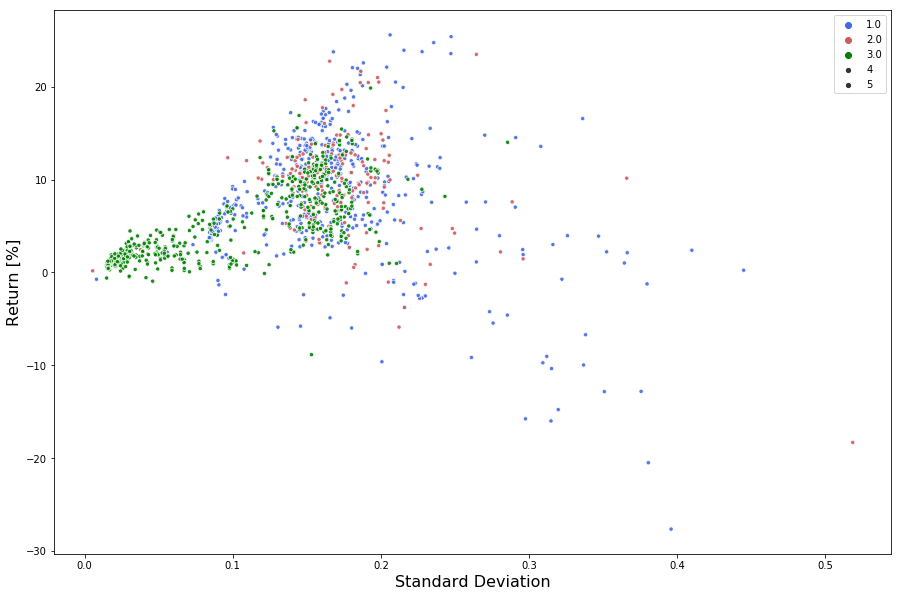

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret["AvgReturnYearly"]*100, x=ret["YearlyStd"], hue=classes, palette=["royalblue", "indianred", "green"], alpha=0.9,size = 5)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
#plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.show()



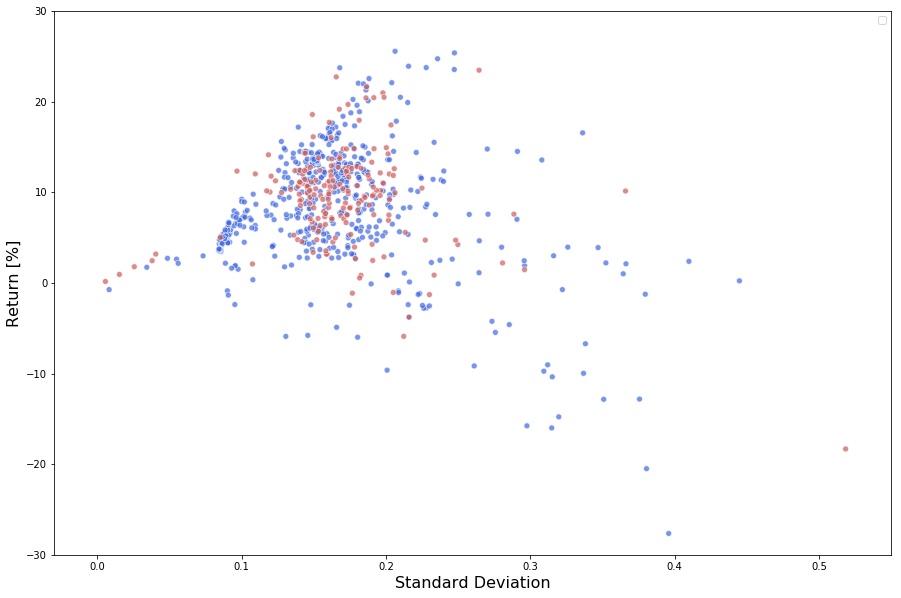

In [132]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret.iloc[:ETF_data.shape[1]+180,:]["AvgReturnYearly"]*100, x=ret.iloc[:ETF_data.shape[1]+180,:]["YearlyStd"], hue=classes[:ETF_data.shape[1]+180], palette=["royalblue", "indianred"], alpha=0.7,s = 35)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.ylim(-30,30)
plt.xlim(-0.03,0.55)
plt.show()


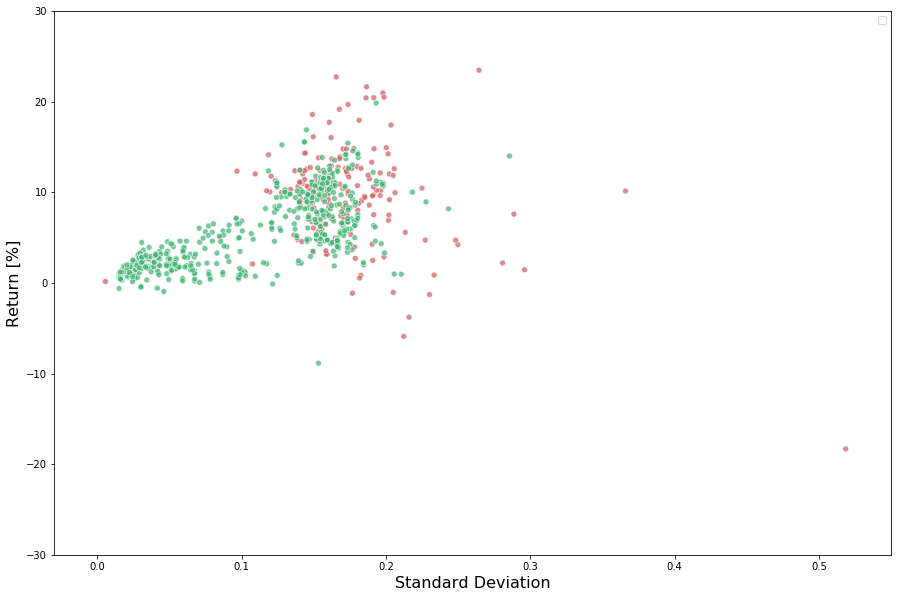

In [135]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret.iloc[ETF_data.shape[1]:,:]["AvgReturnYearly"]*100, x=ret.iloc[ETF_data.shape[1]:,:]["YearlyStd"], hue=classes[ETF_data.shape[1]:], palette=["indianred", "mediumseagreen"], alpha=0.7,s= 35)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.ylim(-30,30)
plt.xlim(-0.03,0.55)
plt.show()

In [65]:
classes

array([1., 1., 1., ..., 3., 3., 3.])

In [27]:
ret[0:ETF_data.shape[1]]

,AvgReturnYearly,YearlyStd
ANGL,0.098036,0.107899
AOA,0.095044,0.126374
AOK,0.067064,0.090789
AOM,0.074388,0.095870
AOR,0.086896,0.109767
...,...,...
XRT,0.051979,0.197673
XSD,0.235663,0.247234
XSLV,0.161552,0.155900
XTN,0.102638,0.217108


It looks like there is an upwards trend in the standard deviation vs. return. What is the correlation between these factors?

In [32]:
ret.corr()

,AvgReturnYearly,YearlyStd
AvgReturnYearly,1.000000,0.259573
YearlyStd,0.259573,1.000000


## 1.3 Plotting cumulative return series

Lets create a new dataframe with cumulative returns over the timeperiod. And use the cumprod() function to calculate the cumulative product.

In [33]:
joined_cumprod=joined.copy()

joined_cumprod=(joined+1).cumprod()

joined_cumprod = joined_cumprod-1

We want to look at the return series for the ETF data and index data.

**Plot the cmulative return of the index and ETF data.**

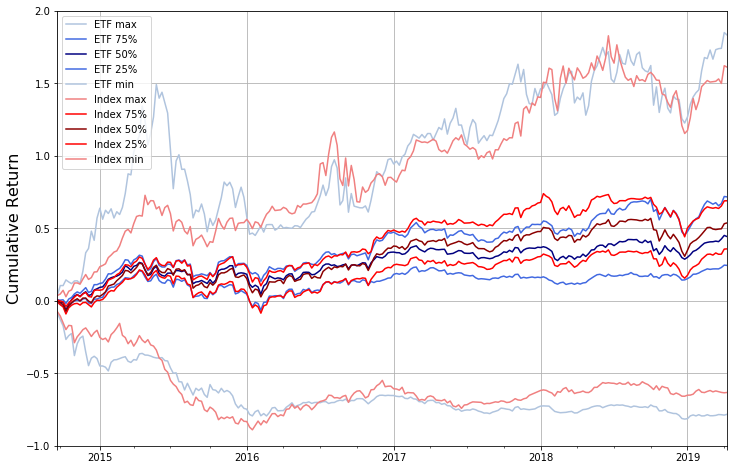

In [78]:
ax = joined_cumprod.iloc[:,:ETF_data.shape[1]].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True,color=["lightsteelblue", "royalblue", "navy", "royalblue", "lightsteelblue"], label=["ETF min", "ETF 25%", "ETF 50%", "ETF 75%", "ETF max"])
joined_cumprod.iloc[:,ETF_data.shape[1]:ETF_data.shape[1]+180].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, ax=ax, color=["lightcoral", "red", "darkred", "red", "lightcoral"])
ax.set_ylabel("Cumulative Return", fontsize = 16)
ax.set_ylim(-1,2)
ax.legend(("ETF max", "ETF 75%", "ETF 50%", "ETF 25%", "ETF min", "Index max", "Index 75%", "Index 50%", "Index 25%", "Index min"))


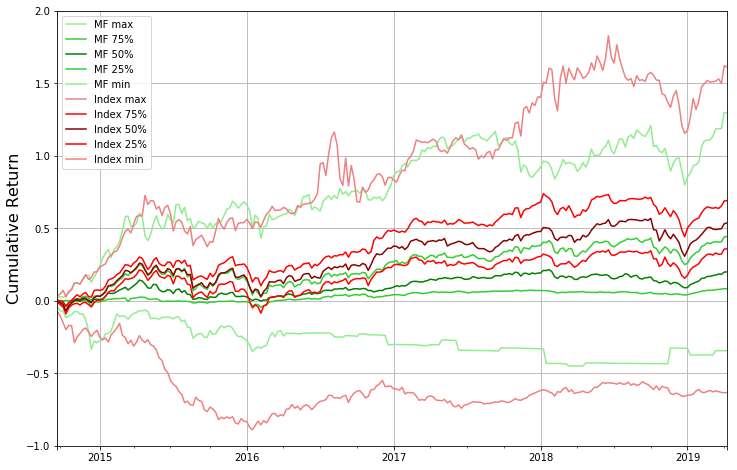

In [51]:
ax = joined_cumprod.iloc[:,ETF_data.shape[1]+181:].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, color=["lightgreen", "limegreen", "green", "limegreen", "lightgreen"])
joined_cumprod.iloc[:,ETF_data.shape[1]:ETF_data.shape[1]+180].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, ax=ax, color=["lightcoral", "red", "darkred", "red", "lightcoral"])
ax.set_ylabel("Cumulative Return", fontsize = 16)
ax.set_ylim(-1,2)
ax.legend(("MF max", "MF 75%", "MF 50%", "MF 25%", "MF min", "Index max", "Index 75%", "Index 50%", "Index 25%", "Index min"))


# 2. Clustering <a class="anchor" id="three"></a>

When clustering the indexes the analysis can be divided into three different parts:
- Determining a measure to quantify the similarities between observations
- Determining which clustering method to use
- Finding the optimal number of clusters

In this chapter the main refrence is a thesis written by Pjotr Roelofsen in 2018, on [Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).


## 2.1 Distance Measures <a class="anchor" id="three.one"></a>

Many different distance measures can be considered when clustering time series data. In this analysis three different methods will be considered:

- The Euclidean Distance (A Lock-Step Measure)
- The Person Correlation Distance (A Lock-Step Measure)
- The Dynamic Time Wraping (Elastic measure)

These methods were chosen since they seem to be the most popular ones and are straight forward in application. When comparing these three distance measures the calculation time for the DTW measure is much higher than for the Correlation measure, but it is more robust and often outperforms the other.


### 2.1.1 Euclidean Distance
The euclidean distance measure is calculated as $d_{euc}(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$.


In [79]:
res = pdist(joined.transpose(), "euclidean")
squareform(res)
distance_eu=pd.DataFrame(squareform(res), index=joined.columns, columns = joined.columns)

In [80]:
distance_eu

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
ANGL,0.000000,0.174167,0.113321,0.116436,0.138331,0.640653,0.195845,0.472614,0.143591,0.162183,...,0.248830,0.214858,0.375774,0.307326,0.227302,0.206408,0.231255,0.210840,0.234791,0.206649
AOA,0.174167,0.000000,0.143035,0.113309,0.059191,0.567345,0.276100,0.398322,0.220873,0.247770,...,0.155984,0.149517,0.339514,0.237044,0.270828,0.247769,0.261611,0.184258,0.163585,0.121117
AOK,0.113321,0.143035,0.000000,0.037996,0.088846,0.606318,0.144136,0.459427,0.093613,0.109513,...,0.244823,0.209304,0.384386,0.296243,0.191937,0.191002,0.215501,0.181839,0.229879,0.185738
AOM,0.116436,0.113309,0.037996,0.000000,0.059518,0.594448,0.170485,0.442170,0.117828,0.138344,...,0.222148,0.190204,0.370128,0.278950,0.203372,0.197153,0.220059,0.175378,0.211040,0.165109
AOR,0.138331,0.059191,0.088846,0.059518,0.000000,0.576273,0.222150,0.418193,0.169012,0.192546,...,0.181363,0.160326,0.350722,0.251607,0.234385,0.218574,0.236657,0.169809,0.179350,0.133267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DK0060477859,0.206408,0.247769,0.191002,0.197153,0.218574,0.658848,0.239029,0.532698,0.198578,0.211386,...,0.300627,0.277666,0.383400,0.335549,0.084333,0.000000,0.095658,0.242414,0.282881,0.237355
DK0060646396,0.231255,0.261611,0.215501,0.220059,0.236657,0.663014,0.261796,0.542734,0.234991,0.237817,...,0.313563,0.294437,0.362437,0.322280,0.127563,0.095658,0.000000,0.250236,0.295806,0.254825
DK0060825214,0.210840,0.184258,0.181839,0.175378,0.169809,0.625697,0.264635,0.491254,0.231483,0.244197,...,0.221986,0.163747,0.357917,0.275538,0.262191,0.242414,0.250236,0.000000,0.174209,0.153132
DK0060360824,0.234791,0.163585,0.229879,0.211040,0.179350,0.594031,0.338917,0.446364,0.293404,0.314720,...,0.172026,0.119925,0.333270,0.216743,0.321795,0.282881,0.295806,0.174209,0.000000,0.131789


In [81]:
joined_norm = joined.copy()
joined_norm = (joined - joined.mean())/joined.std()
joined_norm.head()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
2014-09-24,0.059872,-0.383199,0.357657,0.204710,-0.112525,0.534050,0.847682,1.005502,0.526602,0.664306,...,-0.144402,0.097338,-0.464188,-0.465664,-0.175458,0.010190,0.262442,0.041503,0.068366,-0.040252
2014-10-01,0.357866,-0.826996,0.273787,-0.055156,-0.456341,0.000711,1.542645,-0.847174,0.995367,1.671668,...,-1.023516,0.134443,-1.157497,-0.958517,0.379580,-1.681587,-1.330135,-0.248500,-0.371564,-0.860181
2014-10-08,-0.192743,-0.173291,-0.421333,-0.383196,-0.097857,0.357412,-0.241711,0.032428,-0.824717,-0.172964,...,-1.266484,-1.523438,-1.030374,-0.018293,0.009484,0.999882,0.080091,-1.189831,-1.096887,-0.512094
2014-10-15,-2.061538,-2.627921,-1.862854,-2.110973,-2.397221,-0.668611,0.140352,-2.246122,-0.760989,-0.015085,...,-2.266481,-2.418884,-0.965611,-1.515732,0.194317,-1.374370,-0.541985,-1.872784,-2.752358,-2.732523
2014-10-22,2.416243,2.141269,1.820581,2.027066,2.093166,-0.039800,0.265194,2.820999,1.200298,0.676276,...,1.549974,1.697308,0.789242,1.099522,-0.406216,1.586806,0.828966,1.948428,2.657820,1.793412


### 2.1.2 Spearman!!! Correlation Distance<a class="anchor" id="three.one.one"></a>

In the Pearson Correlation Distance the linear association between two time series is calculated. For further information on how the correlation is defined, see [chapter 2.1.2](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). The correlation lies in the range [-1,1] and the distance is defined as
$d_{cor}(x,y)=1-\rho(x,y)$. So if the correlation is high, the distance is small and if it is low the distance is high. 

This distance measure is considered a lock-step method since it compares the same timepoint between both series.

In [82]:
corr = joined.corr(method="spearman") #calculate the correlation
distance_corr =(1-corr) #distance based on correlation

In [83]:
distance_corr

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
ANGL,0.000000,0.262823,0.165987,0.173701,0.207951,0.747830,0.450103,0.577341,0.265541,0.338252,...,0.371311,0.326250,0.569201,0.516695,0.736417,0.562771,0.738255,0.392827,0.371762,0.344463
AOA,0.262823,0.000000,0.167813,0.098005,0.029803,0.557309,0.666852,0.324160,0.438647,0.559532,...,0.142840,0.171281,0.415898,0.297440,0.907936,0.603872,0.696294,0.284497,0.164415,0.131202
AOK,0.165987,0.167813,0.000000,0.023479,0.081243,0.655195,0.277641,0.443005,0.134364,0.180036,...,0.365575,0.308628,0.623761,0.478357,0.745497,0.738664,0.814547,0.321145,0.332925,0.304312
AOM,0.173701,0.098005,0.023479,0.000000,0.033589,0.614362,0.362556,0.383945,0.194447,0.263941,...,0.289216,0.252941,0.552082,0.407978,0.772649,0.701857,0.788607,0.299865,0.268881,0.240120
AOR,0.207951,0.029803,0.081243,0.033589,0.000000,0.569714,0.515734,0.334000,0.314750,0.410009,...,0.193211,0.194997,0.475680,0.335672,0.834969,0.644493,0.728873,0.276044,0.198594,0.167727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DK0060477859,0.562771,0.603872,0.738664,0.701857,0.644493,0.847426,1.039928,0.728993,0.951150,0.970138,...,0.549787,0.538419,0.498229,0.534666,0.804426,0.000000,0.386608,0.625541,0.501148,0.502267
DK0060646396,0.738255,0.696294,0.814547,0.788607,0.728873,0.880903,1.027280,0.782271,1.072203,1.002592,...,0.701051,0.707047,0.456925,0.543060,0.797106,0.386608,0.000000,0.680447,0.657598,0.668685
DK0060825214,0.392827,0.284497,0.321145,0.299865,0.276044,0.753698,0.624598,0.570455,0.493012,0.549287,...,0.297814,0.190367,0.545364,0.410727,0.797236,0.625541,0.680447,0.000000,0.204956,0.195060
DK0060360824,0.371762,0.164415,0.332925,0.268881,0.198594,0.597552,0.785432,0.424902,0.584331,0.693955,...,0.165477,0.092748,0.438840,0.223640,0.898152,0.501148,0.657598,0.204956,0.000000,0.112437


In [144]:
corr.iloc[537+180:,537+180:].mean().mean()

0.448676303661463

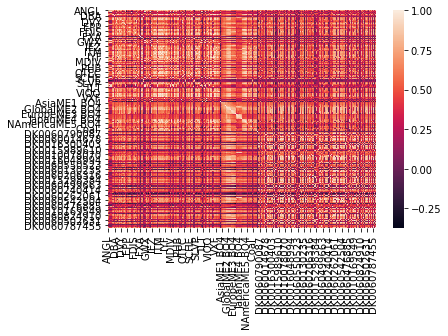

In [85]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=30 ,#corr.columns,
        yticklabels=30 #corr.columns,
           )

### 2.1.3 Dynamic Time Wrapping<a class="anchor" id="three.one.two"></a> 

The difference between elastic distance measures and lock-step distance measures is that the elastic measures allow for one-to-many or one-to-none point matching. This gives more flexibility and robustness for example in handling outliers.

DTW is a relatively new method, introduced in 2004, which seeks to overcome some of the disadvantages of the Euclidean distance. In general, DTW calculates an optimal match between two given sequences, ot the path that has the minimal cost (while fulfilling all the restrictions). For further details on oth the algorithm works see [Wikipedia article](https://en.wikipedia.org/wiki/Dynamic_time_warping) or [Pjotr Roelofsens thesis on Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).

Here the dtw function in tslearn is used to calculate the dtw value, for docmumentation see [here](https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.dtw.html).

Lets try the function and see how it works.

So it delivers a single similarity measure when two time-series are compared. Now we calculate the dtw matrix comparing all pairs of the time series.

In [86]:
#joined = joined.iloc[:,::4]

In [87]:
joined_np=np.transpose(joined.values) #change the dataframe into a numpy array

distance_dtw =cdist_dtw(joined_np) #calculate the dtw matrix

distance_dtw=pd.DataFrame(data = distance_dtw, index=joined.columns, columns=joined.columns) #save it into a dataframe

In [88]:
distance_dtw

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
ANGL,0.000000,0.152515,0.104931,0.107883,0.126025,0.506956,0.143890,0.391212,0.121805,0.131778,...,0.195843,0.176182,0.280747,0.237458,0.206803,0.169362,0.159356,0.162480,0.193500,0.158396
AOA,0.152515,0.000000,0.130026,0.107918,0.058529,0.478375,0.180573,0.342075,0.168405,0.181324,...,0.143436,0.135947,0.260681,0.210270,0.246461,0.205036,0.191705,0.139825,0.150439,0.110920
AOK,0.104931,0.130026,0.000000,0.036743,0.083720,0.514730,0.114946,0.404751,0.085310,0.096542,...,0.207056,0.178879,0.296236,0.245904,0.171483,0.136294,0.137317,0.149754,0.199055,0.153735
AOM,0.107883,0.107918,0.036743,0.000000,0.058204,0.511839,0.125331,0.392274,0.101641,0.114714,...,0.196209,0.167762,0.288325,0.239619,0.182442,0.147375,0.141565,0.145147,0.189471,0.143543
AOR,0.126025,0.058529,0.083720,0.058204,0.000000,0.494529,0.151238,0.364343,0.134121,0.145021,...,0.164908,0.144814,0.275068,0.220088,0.212238,0.171977,0.161758,0.133506,0.166546,0.118612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DK0060477859,0.169362,0.205036,0.136294,0.147375,0.171977,0.572993,0.160751,0.473022,0.127440,0.138594,...,0.259640,0.239616,0.347466,0.296964,0.070727,0.000000,0.075683,0.201489,0.250612,0.200444
DK0060646396,0.159356,0.191705,0.137317,0.141565,0.161758,0.546383,0.159832,0.450394,0.127626,0.141649,...,0.238110,0.222444,0.321420,0.273295,0.113546,0.075683,0.000000,0.186522,0.231300,0.185265
DK0060825214,0.162480,0.139825,0.149754,0.145147,0.133506,0.469044,0.175548,0.366316,0.173098,0.176130,...,0.171273,0.137044,0.268777,0.205183,0.242363,0.201489,0.186522,0.000000,0.147264,0.126747
DK0060360824,0.193500,0.150439,0.199055,0.189471,0.166546,0.455194,0.215378,0.350911,0.221442,0.223804,...,0.157267,0.113609,0.255734,0.192093,0.298370,0.250612,0.231300,0.147264,0.000000,0.125257


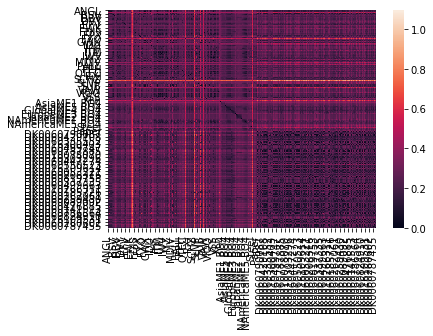

In [89]:
%matplotlib inline

# plot the heatmap
sns.heatmap(distance_dtw, 
        xticklabels=20 ,#corr.columns,
        yticklabels=20 #corr.columns,
           )

And as the with the distance based on correlation an index has a distance of 0 with itself.

## 2.2 Hierarchial clustering <a class="anchor" id="three.two"></a>

Here agglomerative clustering will be used, which is a bottom-up approch. This means that in the beginning all observations form their individual cluster and in each step the closest clusters combine into a new cluster. This is repeated until all observations are in one big cluster. Three methods are most commonly used to define the distance between clusters, Single linkage, Complete linkage and Ward linkage. In single linkage the distance is defined as the smallest distance between any observations in the two clusters, while complete linkage is the biggest distance between any two observations in the two clusters. Ward linkage aims to minimize the variance within each cluster. For further information on hierarchial clustering, see [here](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). 

Scipy.cluster.hierarchy will be used in this section. Documentation on the package used can be found [here](https://docs.scipy.org/doc/scipy-0.9.0/reference/cluster.hierarchy.html). Here it is possible to use the distance matrixes as input into the clustering algorithm.

Tutorial on how to use the packages can be found [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/).
 
An important question here is what is the optimal number of clusters? 


This function helps us plot nice dendograms.

In [90]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### 2.2.1 Single linkage <a class="anchor" id="three.two.one"></a>

Here we use the single linkage method to cluster the indexes for the two different distance measures applied.

In [91]:
#Euclidean distance matrix
con_distance_eu = squareform(distance_eu) #condence the distance matrix to be able to fit the hierarcal clustering
single_eu = single(con_distance_eu) #apply hierarchial clustering using the single distance measure

#corr perman distance matrix
con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
single_corr = single(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
single_dtw = single(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

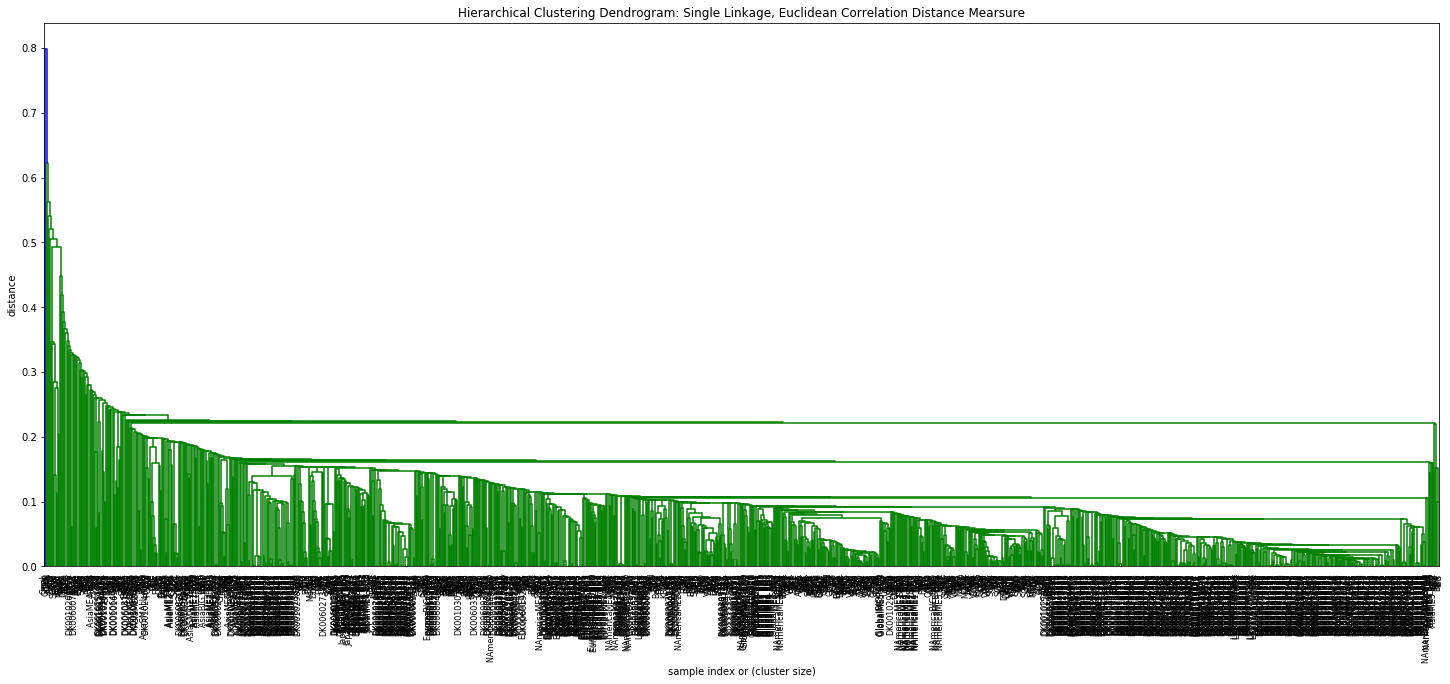

In [92]:
plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Correlation Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
fancy_dendrogram(
    single_eu,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Euclidean Correlation Distance Mearsure')
plt.show()

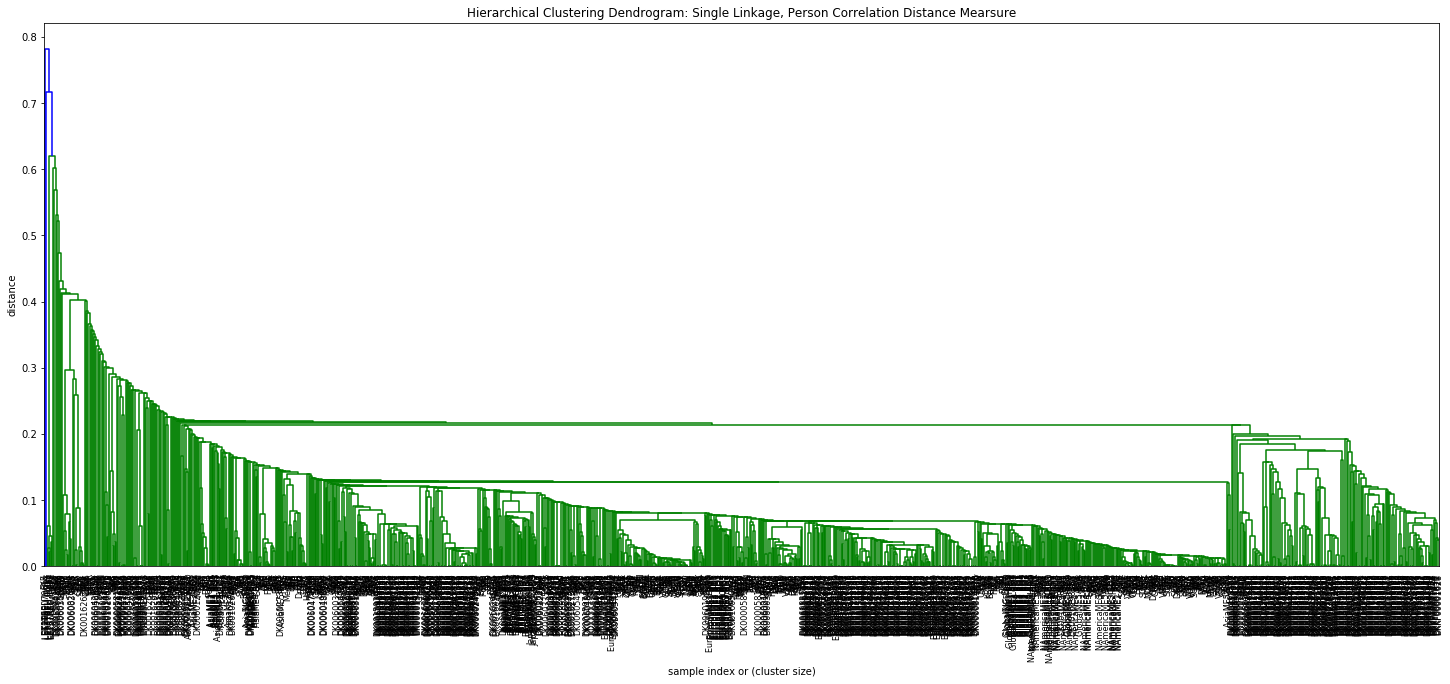

In [93]:
plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Correlation Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
fancy_dendrogram(
    single_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Person Correlation Distance Mearsure')
plt.show()

### 2.2.2 Complete linkage <a class="anchor" id="three.two.two"></a>

Here we use the complete linkage method to cluster the indexes for the two different distance measures applied.

In [94]:
#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
complete_eu = complete(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
complete_dtw = complete(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

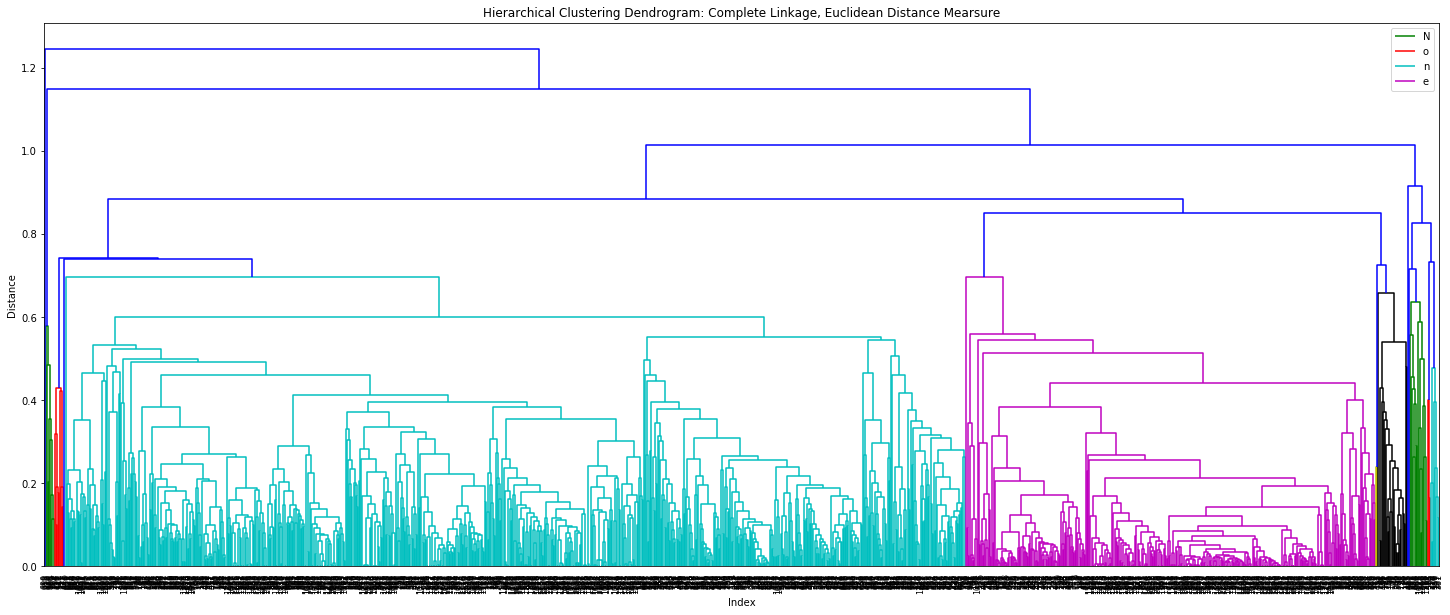

In [95]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_eu,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = ,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Euclidean Distance Mearsure')
plt.legend("None")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

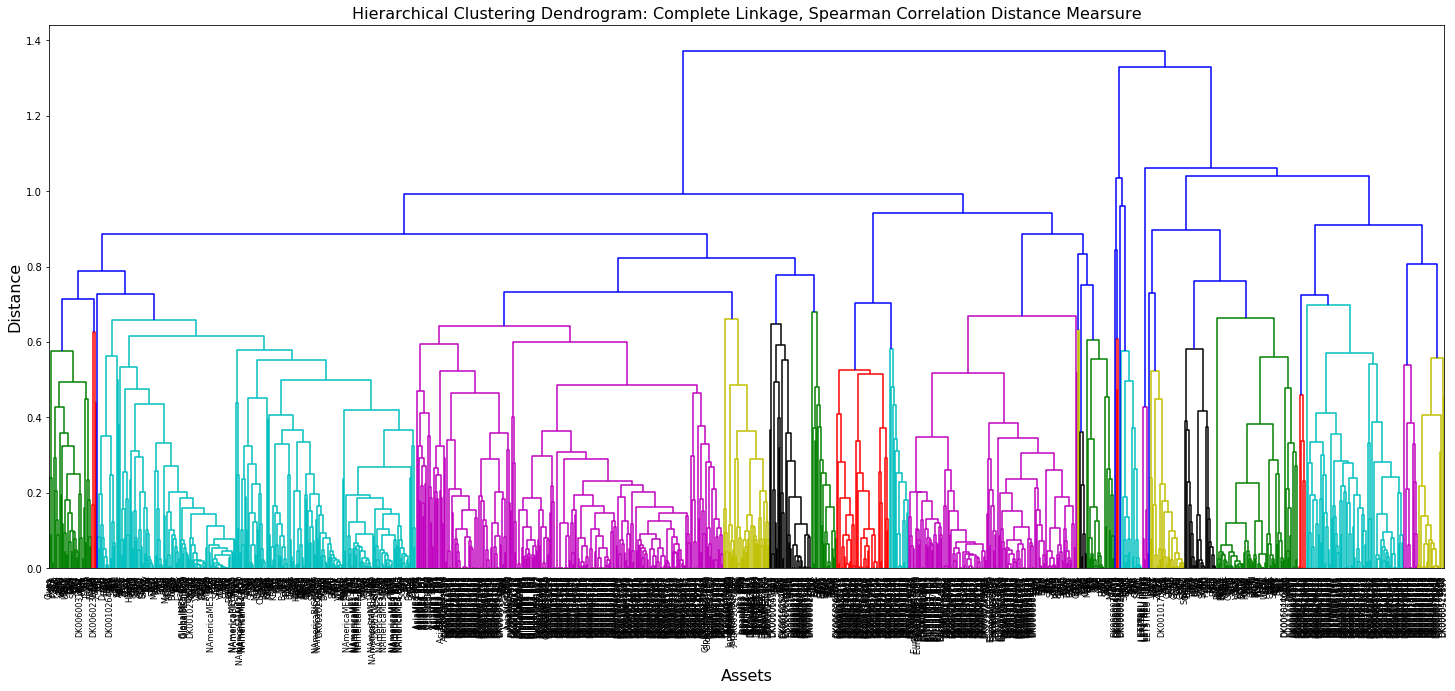

In [96]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Spearman Correlation Distance Mearsure', fontsize = 16)
plt.xlabel('Assets', fontsize = 16)
plt.ylabel('Distance', fontsize = 16)
plt.show()

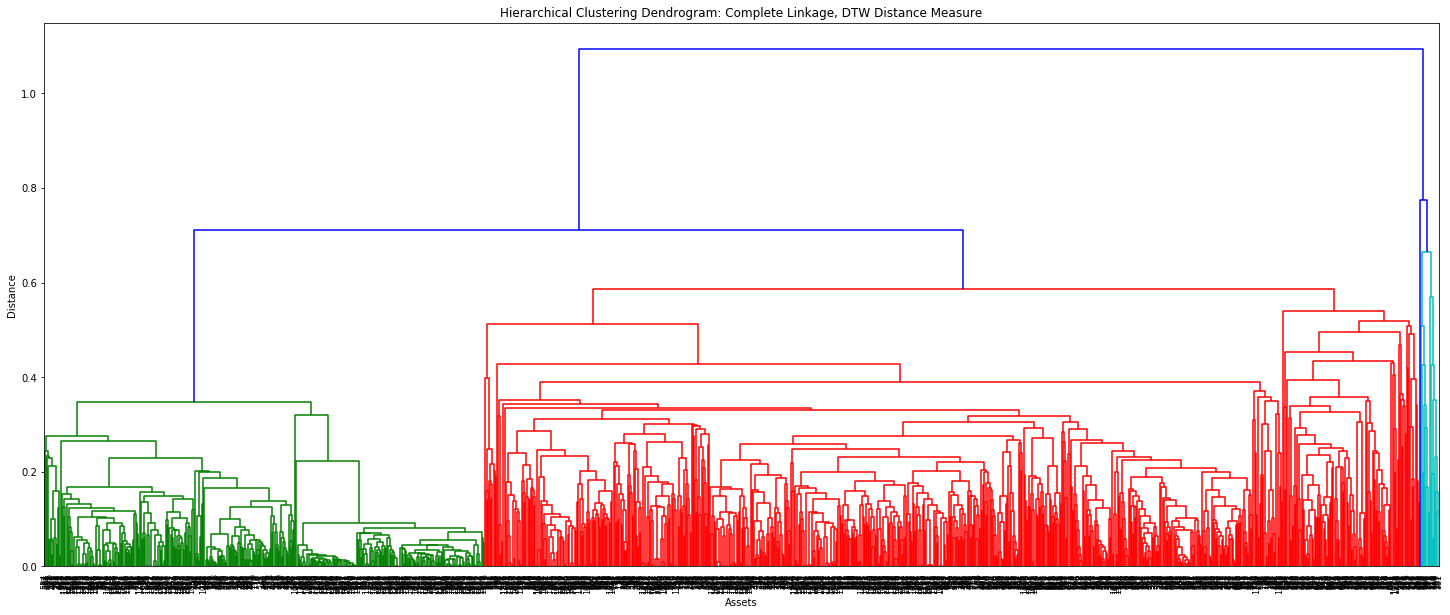

In [97]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, DTW Distance Measure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

### 2.2.3 Ward linkage <a class="anchor" id="three.two.three"></a>

Here we use the ward linkage method to cluster the indexes for the two different distance measures applied.

In [98]:
#spearman corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
ward_eu = ward(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
ward_corr = ward(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
ward_dtw = ward(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

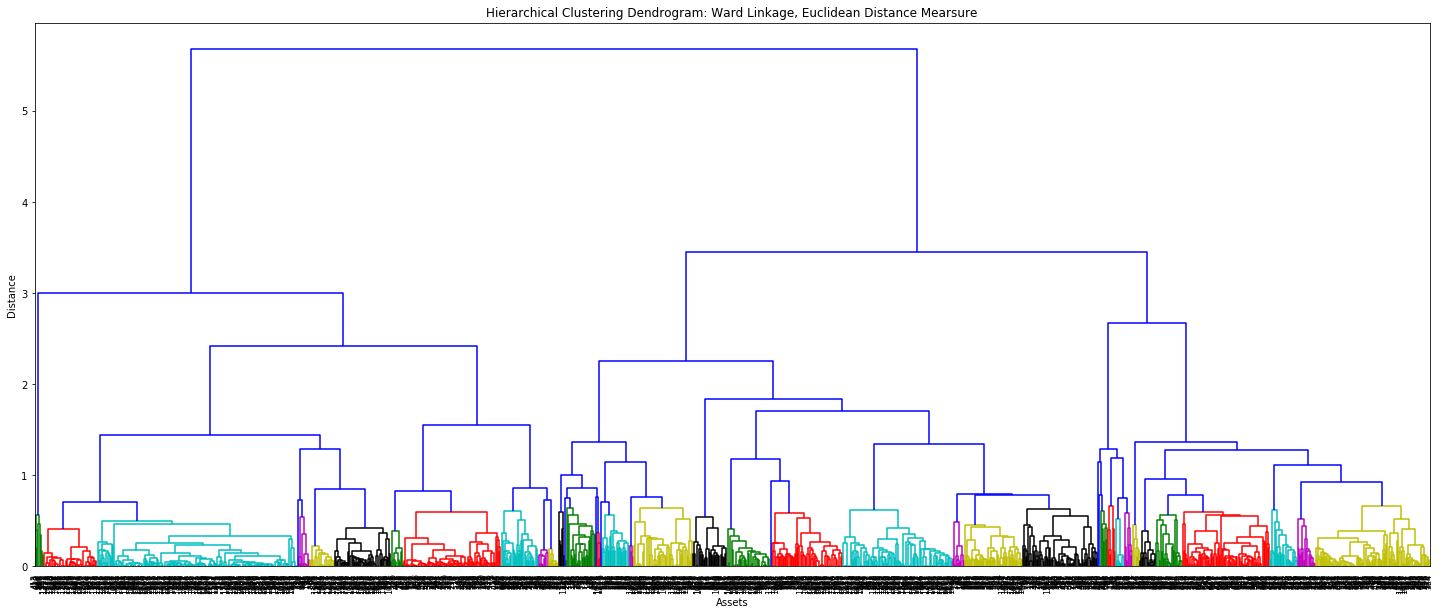

In [99]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_eu,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = 
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, Euclidean Distance Mearsure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

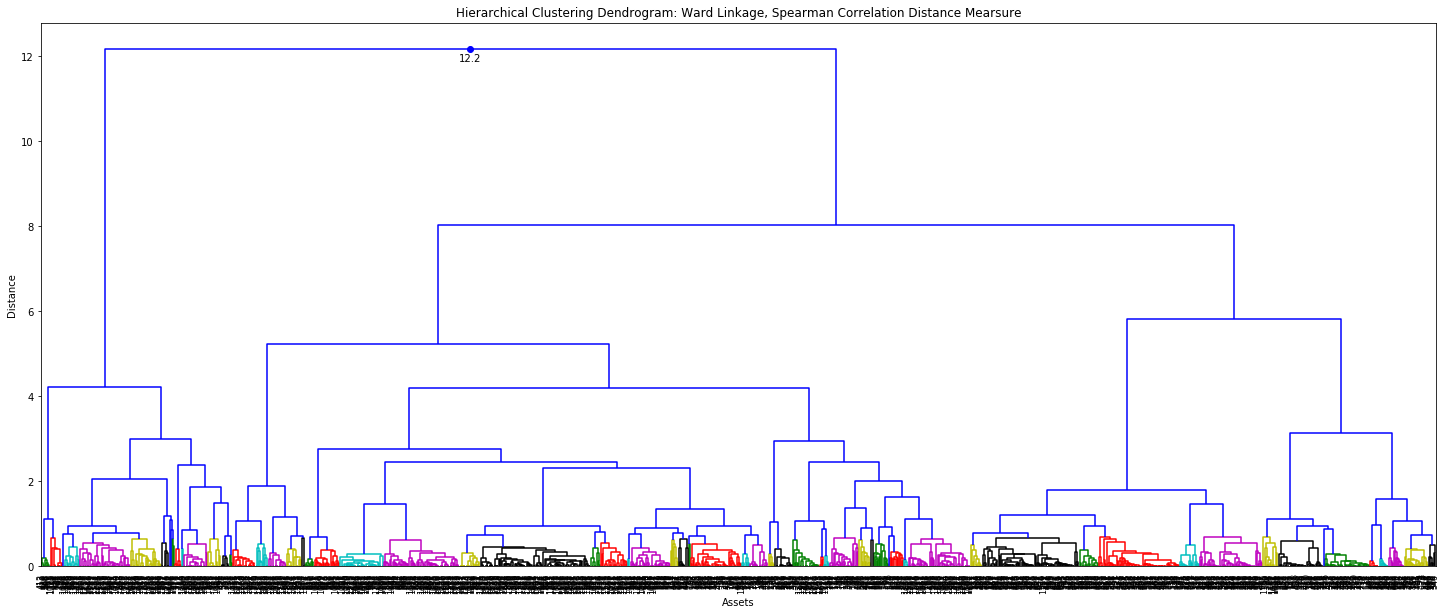

In [100]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
 #   labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, Spearman Correlation Distance Mearsure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

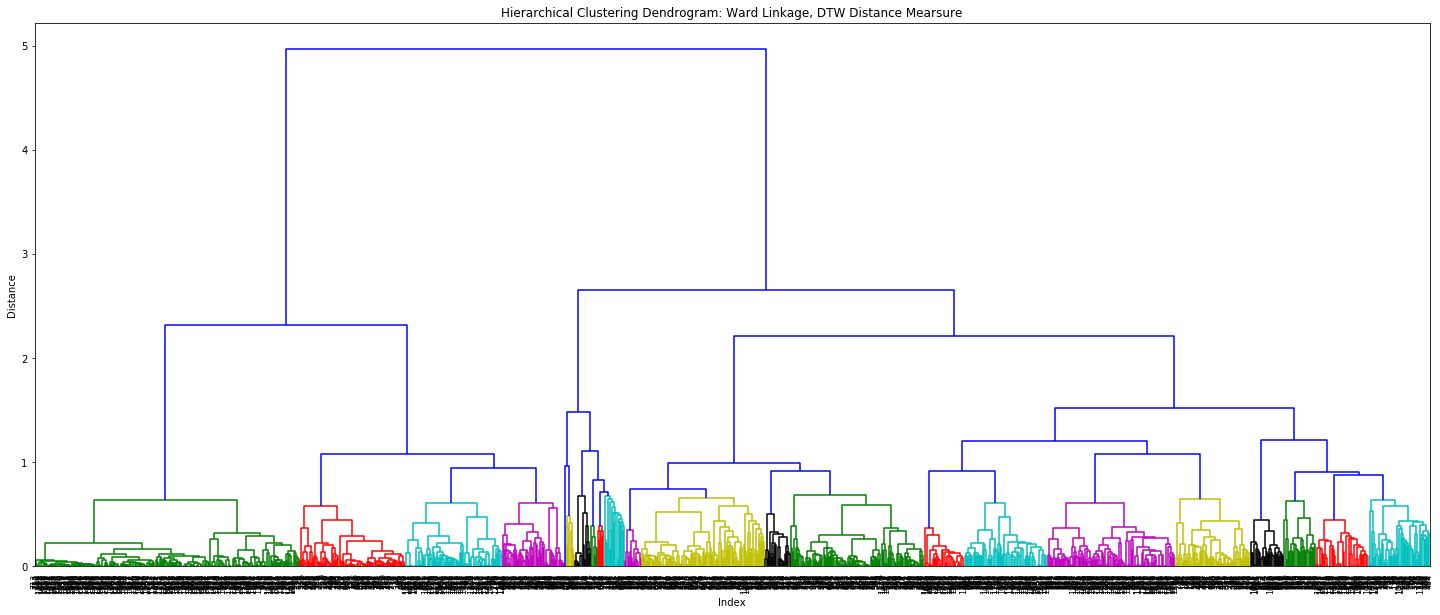

In [101]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, DTW Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

## 2.3 Finding the Optimal Number of Clusters with the Silhouette Coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

We begin by looking at the silhouette score for the ward and complete linkages and the correlation and dtw distance measures. The Silhouette Score is calculated by lookin at the intra-cluster distance as well as the mean distance to the nearest cluster for each observation/asset. It returns a score between -1 and 1, -1 suggesting incorrect clustering and 1 really good clustering where the clusteres are very dence.

**Complete Linkage, Correlation Distance Measure.**

In [102]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(complete_corr, i, criterion="maxclust"), metric="precomputed" ))
    

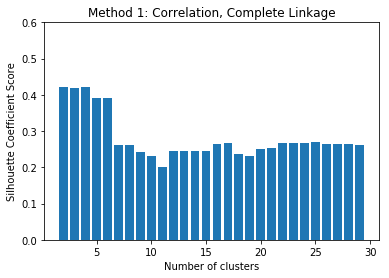

In [103]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.ylim(0,0.6)
plt.title("Method 1: Correlation, Complete Linkage")
plt.show()

**Ward Linkage, Correlation Distance Measure.**

In [104]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(ward_corr, i, criterion="maxclust"), metric="precomputed" ))

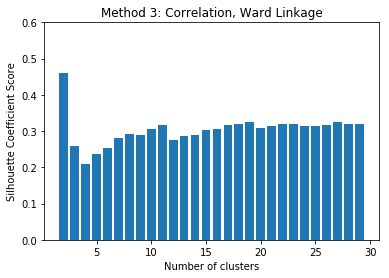

In [105]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.ylim(0,0.6)
plt.title("Method 3: Correlation, Ward Linkage")
plt.show()

**Complete linkage, DTW**

In [106]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(complete_dtw, i, criterion="maxclust"), metric="precomputed" ))
    

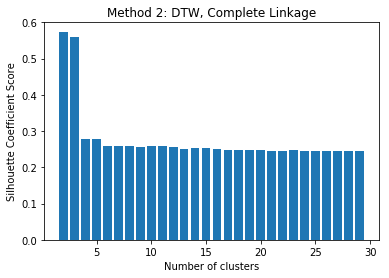

In [107]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.ylim(0,0.6)
plt.title("Method 2: DTW, Complete Linkage")
plt.show()

**Ward linkage, DTW**

In [108]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(ward_dtw, i, criterion="maxclust"), metric="precomputed" ))

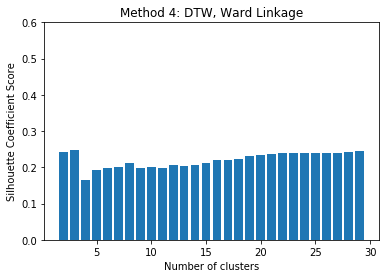

In [109]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
#plt.xticks("")
plt.ylim(0,0.6)
plt.title("Method 4: DTW, Ward Linkage")
plt.show()

**And now we want to save the clustering into a dataframe.**

In [110]:
#Create the dataframe
cluster_df = pd.DataFrame(index=distance_corr.index)

#Save the Ward_Eu clustering into the dataframe with 8 clusters
#cluster_df["Ward_Eu"] = fcluster(ward_eu, 3, criterion="maxclust")

#Save the Ward_Corr clustering into the dataframe with 8 clusters
cluster_df["Ward_Corr"] = fcluster(ward_corr, 3, criterion="maxclust")

#Save the Ward_DTW clustering into the dataframe with 8 clusters
cluster_df["Ward_DTW"] = fcluster(ward_dtw, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
#cluster_df["Complete_Eu"] = fcluster(complete_eu, 3, criterion="maxclust")

#Save the Complete_Corr clustering into the dataframe with 8 clusters
cluster_df["Complete_Corr"] = fcluster(complete_corr, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
cluster_df["Complete_DTW"] = fcluster(complete_dtw, 3, criterion="maxclust")

#Save the Return into the dataframe
cluster_df["AverageRet"] = ret["AvgReturnYearly"]

#Save the Standard Deviation into the dataframe
cluster_df["StandardDev"] = ret["YearlyStd"]

#Add the sharpe ratio to the dataframe
cluster_df["Sharpe_Ratio"] = (ret["AvgReturnYearly"])/ret["YearlyStd"]

#Add the class (ETF or index) to the dataframe
cluster_df["Class"] = classes

In [2]:
cluster_df.head()

NameError: name 'cluster_df' is not defined

In [192]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-clusters.csv")

## 2.4 Looking into the Comopstition of Complete Correlation Clustering

The reason why we choose to look better into the Ward Correlation Clustering is the fact that the assets seem to spread well between the clusters and the hiearical clustering plots look good.

**How many assets are in each cluster?**

In [112]:
cluster_df.groupby(["Complete_Corr"]).count()["Sharpe_Ratio"]

Complete_Corr
1    973
2     25
3    276
Name: Sharpe_Ratio, dtype: int64

**What is the average yearly return and std in each cluster?**

In [113]:
cluster_df.groupby(["Complete_Corr"]).mean()["AverageRet"]

Complete_Corr
1    0.081069
2    0.009123
3    0.041764
Name: AverageRet, dtype: float64

In [114]:
cluster_df.groupby(["Complete_Corr"]).mean()["StandardDev"]

Complete_Corr
1    0.155942
2    0.197124
3    0.067151
Name: StandardDev, dtype: float64

Here we see that the average return of cluster 1 is the highest or 13\% while having a standard deviation of 0.17. Cluster 3 has the lowest average return and the highest standard deviation of 0.20. We might guess that cluster 4 indcludes the bond indexes since it has by far the lowest standard deviation of 0.11.

**How do the indexes and ETFs spread between the clusters.**

In [115]:
cluster_df[cluster_df["Complete_Corr"] == 1].groupby(["Class"]).count()["Complete_Corr"]

Class
1.0    394
2.0    169
3.0    410
Name: Complete_Corr, dtype: int64

In [116]:
cluster_df[cluster_df["Complete_Corr"] == 2].groupby(["Class"]).count()["Complete_Corr"]

Class
1.0    18
2.0     1
3.0     6
Name: Complete_Corr, dtype: int64

In [117]:
cluster_df[cluster_df["Complete_Corr"] == 3].groupby(["Class"]).count()["Complete_Corr"]

Class
1.0    125
2.0     11
3.0    140
Name: Complete_Corr, dtype: int64

So we see that all the clusters consist of both indexes and ETFs, good news! Which gives us the idea that the indexes should represent the ETFs pretty well.

**Plot the clusters on a return/std plot.**

In [119]:
cluster_df["hue_1"]=cluster_df["Class"]
for i in range(0,len(cluster_df)):
    if cluster_df["Class"].iloc[i] == 1:
        value = "ETF"
        cluster_df["hue_1"].iloc[i] = str(cluster_df["Ward_Corr"].iloc[i]) + value
    elif cluster_df["Class"].iloc[i] == 2:
        value = "Index"
        cluster_df["hue_1"].iloc[i] = str(cluster_df["Ward_Corr"].iloc[i]) + value

/Users/a/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [120]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=ret["AvgReturnYearly"]*100, x=ret["YearlyStd"], hue = cluster_df["hue_1"], palette = ["blue", "red", "green", "lightskyblue", "lightsalmon", "lightgreen"], s=30, alpha=0.7)
plt.title("Ward Linkage, Spearman Correlation Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return")
plt.xlabel("Standard Deviation")

plt.show()

ValueError: The palette list has the wrong number of colors.

<Figure size 1080x648 with 0 Axes>

In [220]:
cluster_df.group(["hue_1"])

AttributeError: 'DataFrame' object has no attribute 'group'

**Now we print out which assets are in each cluster.**

Begin by looking into cluster 1:

In [1]:
print("ETFs in cluster 1: \n ")
cluster_df[(cluster_df["Complete_Corr"] == 1) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 1: 
 


NameError: name 'cluster_df' is not defined

In [130]:
print("indexes in cluster 1: \n ")
cluster_df[(cluster_df["Complete_Corr"] == 1) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 1: 
 


['Gold ']

In [118]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_Corr"] == 1]["AverageRet"]*100, x=cluster_df[cluster_df["Complete_Corr"] == 1]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7, )
#plt.title("CLUSTER 3 \n Complete Linkage, Spearman Correlation Disatance \n Yearly Return vs. Yearly Standard deviation \n ")
plt.ylabel("Return [%]", fontsize = 16)
plt.xlabel("Standard Deviation", fontsize = 16)
axes = plt.gca()
axes.set_ylim(-0.3*100,0.3*100)
axes.set_xlim(0,0.5)

plt.show()

ValueError: The palette list has the wrong number of colors.

<Figure size 1080x648 with 0 Axes>

Now we look into cluster 2:

In [132]:
print("ETFs in cluster 2: \n ")
cluster_df[(cluster_df["Complete_Corr"] == 2) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 2: 
 


['AOA',
 'AOK',
 'AOM',
 'AOR',
 'ASHR',
 'BBH',
 'BRF',
 'CDC',
 'CGW',
 'CSM',
 'CWB',
 'CWI',
 'DBA',
 'DBB',
 'DBC',
 'DBE',
 'DBEF',
 'DBEU',
 'DBJP',
 'DBO',
 'DEM',
 'DES',
 'DFE',
 'DFJ',
 'DGRO',
 'DGRW',
 'DGS',
 'DHS',
 'DIA',
 'DIV',
 'DJP',
 'DLN',
 'DLS',
 'DOL',
 'DON',
 'DSI',
 'DTD',
 'DTN',
 'DVY',
 'DVYA',
 'DVYE',
 'DWM',
 'DWX',
 'DXGE',
 'DXJ',
 'EBND',
 'ECH',
 'EDEN',
 'EDIV',
 'EELV',
 'EEM',
 'EEMA',
 'EEMS',
 'EEMV',
 'EFA',
 'EFAV',
 'EFG',
 'EFV',
 'EIDO',
 'EIRL',
 'ELD',
 'EMLC',
 'ENZL',
 'EPHE',
 'EPOL',
 'EPP',
 'EPU',
 'EUFN',
 'EWA',
 'EWC',
 'EWD',
 'EWG',
 'EWH',
 'EWI',
 'EWJ',
 'EWK',
 'EWL',
 'EWM',
 'EWN',
 'EWP',
 'EWQ',
 'EWS',
 'EWT',
 'EWU',
 'EWW',
 'EWX',
 'EWY',
 'EWZ',
 'EZA',
 'EZM',
 'EZU',
 'FBT',
 'FCG',
 'FCOM',
 'FDD',
 'FDIS',
 'FDL',
 'FDN',
 'FENY',
 'FEU',
 'FEX',
 'FEZ',
 'FGD',
 'FHLC',
 'FIDU',
 'FMAT',
 'FNCL',
 'FNDA',
 'FNDC',
 'FNDE',
 'FNDF',
 'FNDX',
 'FNX',
 'FPX',
 'FTA',
 'FTC',
 'FTCS',
 'FTEC',
 'FVD',
 'FXA',
 '

In [133]:
print("indexes in cluster 2: \n ")
cluster_df[(cluster_df["Complete_Corr"] == 2) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 2: 
 


['AsiaSMALL LoBO',
 'AsiaME1 BO2',
 'AsiaME1 BO3',
 'AsiaME1 BO4',
 'AsiaSMALL HiBO',
 'AsiaME2 BO1',
 'AsiaME2 BO2',
 'AsiaME2 BO3',
 'AsiaME2 BO4',
 'AsiaME2 BO5',
 'AsiaME3 BO1',
 'AsiaME3 BO2',
 'AsiaME3 BO3',
 'AsiaME3 BO4',
 'AsiaME3 BO5',
 'AsiaME4 BO1',
 'AsiaME4 BO2',
 'AsiaME4 BO3',
 'AsiaME4 BO4',
 'AsiaME4 BO5',
 'AsiaBIG LoBO',
 'AsiaME5 BO2',
 'AsiaME5 BO3',
 'AsiaME5 BO4',
 'AsiaBIG HiBO',
 'GlobalSMALL LoBO',
 'GlobalME1 BO2',
 'GlobalME1 BO3',
 'GlobalME1 BO4',
 'GlobalSMALL HiBO',
 'GlobalME2 BO1',
 'GlobalME2 BO2',
 'GlobalME2 BO3',
 'GlobalME2 BO4',
 'GlobalME2 BO5',
 'GlobalME3 BO1',
 'GlobalME3 BO2',
 'GlobalME3 BO3',
 'GlobalME3 BO4',
 'GlobalME3 BO5',
 'GlobalME4 BO1',
 'GlobalME4 BO2',
 'GlobalME4 BO3',
 'GlobalME4 BO4',
 'GlobalME4 BO5',
 'GlobalBIG LoBO',
 'GlobalME5 BO2',
 'GlobalME5 BO3',
 'GlobalME5 BO4',
 'GlobalBIG HiBO',
 'EuropeSMALL LoBO',
 'EuropeME1 BO2',
 'EuropeME1 BO3',
 'EuropeME1 BO4',
 'EuropeSMALL HiBO',
 'EuropeME2 BO1',
 'EuropeME2 BO2',
 '

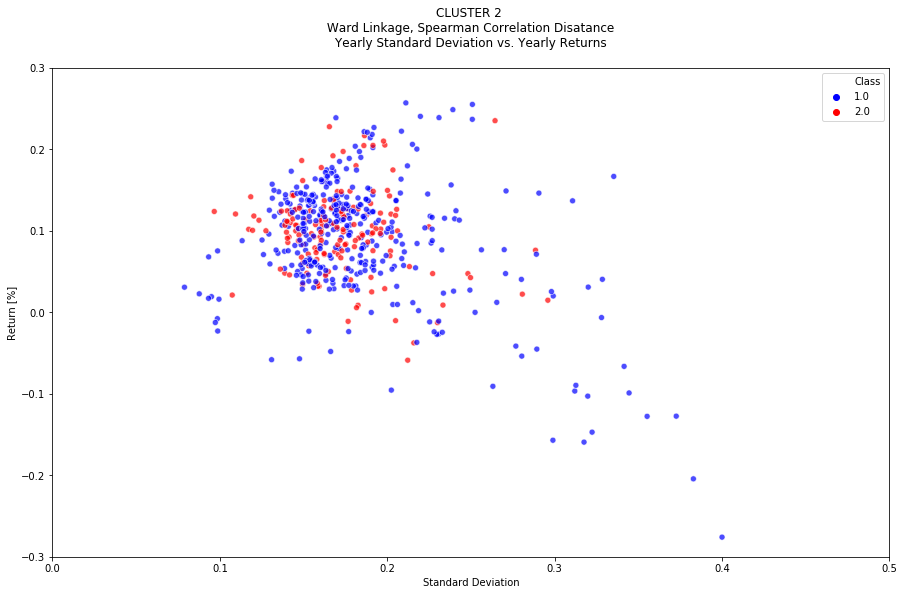

In [134]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_Corr"] == 2]["AverageRet"], x=cluster_df[cluster_df["Complete_Corr"] == 2]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 2 \n Ward Linkage, Spearman Correlation Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

Now we look into cluster 3:

In [135]:
print("ETFs in cluster 3: \n ")
cluster_df[(cluster_df["Complete_Corr"] == 3) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 3: 
 


['ANGL',
 'BIL',
 'BIV',
 'BKLN',
 'BND',
 'BNDX',
 'BOND',
 'BSCJ',
 'BSCK',
 'BSCL',
 'BSCM',
 'BSJJ',
 'BSJK',
 'BSV',
 'CMBS',
 'CMF',
 'DBV',
 'EMB',
 'EMHY',
 'FLOT',
 'FLRN',
 'FRI',
 'FSTA',
 'FTSM',
 'FUTY',
 'FXG',
 'FXU',
 'GBF',
 'GNMA',
 'GOVT',
 'GSY',
 'GVI',
 'HYD',
 'HYEM',
 'HYG',
 'HYMB',
 'HYS',
 'ICF',
 'IDU',
 'IEI',
 'IPE',
 'ISTB',
 'ITE',
 'ITM',
 'IUSB',
 'IYK',
 'IYR',
 'JNK',
 'JXI',
 'KXI',
 'MBB',
 'MINT',
 'MUB',
 'MUNI',
 'PBJ',
 'PCY',
 'PFF',
 'PFXF',
 'PGF',
 'PGX',
 'PHB',
 'PSK',
 'PSL',
 'PUI',
 'PWZ',
 'PZA',
 'REET',
 'REZ',
 'RHS',
 'RWO',
 'RWR',
 'RYU',
 'SCHH',
 'SCHO',
 'SCHP',
 'SCHR',
 'SCHZ',
 'SHM',
 'SHV',
 'SHY',
 'SHYG',
 'SJNK',
 'SLQD',
 'SNLN',
 'SPFF',
 'SRLN',
 'STIP',
 'STPZ',
 'SUB',
 'TDTF',
 'TDTT',
 'TFI',
 'TIP',
 'USDU',
 'UUP',
 'VCSH',
 'VDC',
 'VGIT',
 'VGSH',
 'VMBS',
 'VNQ',
 'VPU',
 'VRP',
 'VTIP',
 'VWOB',
 'XLP',
 'XLU']

In [136]:
print("indexes in cluster 3: \n ")
cluster_df[(cluster_df["Complete_Corr"] == 3) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 3: 
 


['Food ',
 'Soda ',
 'Beer ',
 'Smoke',
 'Hshld',
 'Util ',
 'LEATTREU Index',
 'LET1TREU Index',
 'LET3TREU Index',
 'LET5TREU Index',
 'LET7TREU Index',
 'LET0TREU Index']

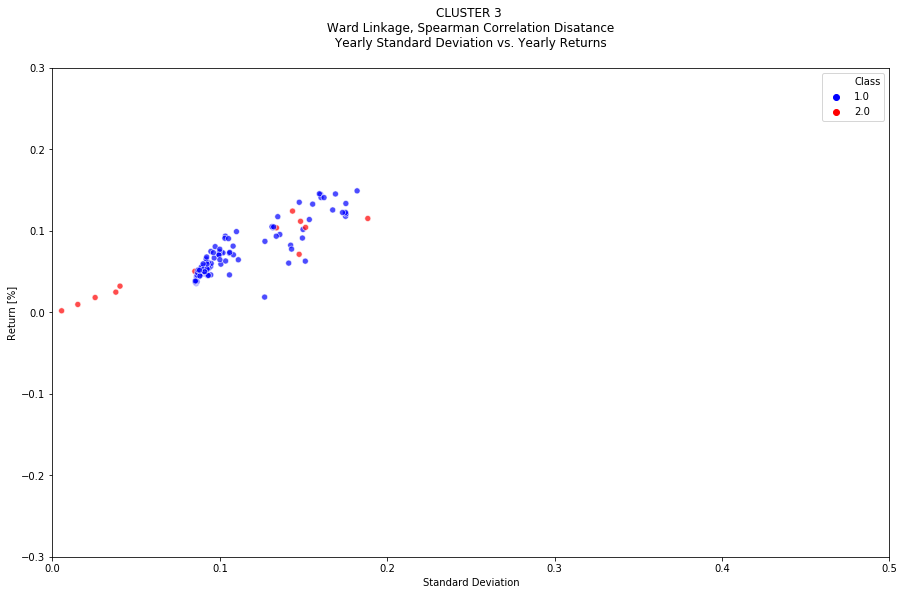

In [137]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_Corr"] == 3]["AverageRet"], x=cluster_df[cluster_df["Complete_Corr"] == 3]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 3 \n Ward Linkage, Spearman Correlation Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

## 2.5 Looking into the Comopstition of Complete DTW Clustering


**How many assets are in each cluster?**

In [138]:
cluster_df.groupby(["Complete_DTW"]).count()["Sharpe_Ratio"]

Complete_DTW
1    701
2     17
3      1
Name: Sharpe_Ratio, dtype: int64

**What is the average yearly return and std in each cluster?**

In [139]:
cluster_df.groupby(["Complete_DTW"]).mean()["AverageRet"]

Complete_DTW
1    0.090384
2   -0.060651
3   -0.183143
Name: AverageRet, dtype: float64

In [140]:
cluster_df.groupby(["Complete_DTW"]).mean()["StandardDev"]

Complete_DTW
1    0.162735
2    0.359714
3    0.518416
Name: StandardDev, dtype: float64

**How do the indexes and ETFs spread between the clusters.**

In [141]:
cluster_df[cluster_df["Complete_DTW"] == 1].groupby(["Class"]).count()["Complete_DTW"]

Class
1.0    523
2.0    178
Name: Complete_DTW, dtype: int64

In [142]:
cluster_df[cluster_df["Complete_DTW"] == 2].groupby(["Class"]).count()["Complete_DTW"]

Class
1.0    16
2.0     1
Name: Complete_DTW, dtype: int64

In [143]:
cluster_df[cluster_df["Complete_DTW"] == 3].groupby(["Class"]).count()["Complete_DTW"]

Class
2.0    1
Name: Complete_DTW, dtype: int64

So we see that all the clusters consist of both indexes and ETFs, good news! Which gives us the idea that the indexes should represent the ETFs pretty well.

**Plot the clusters on a return/std plot.**

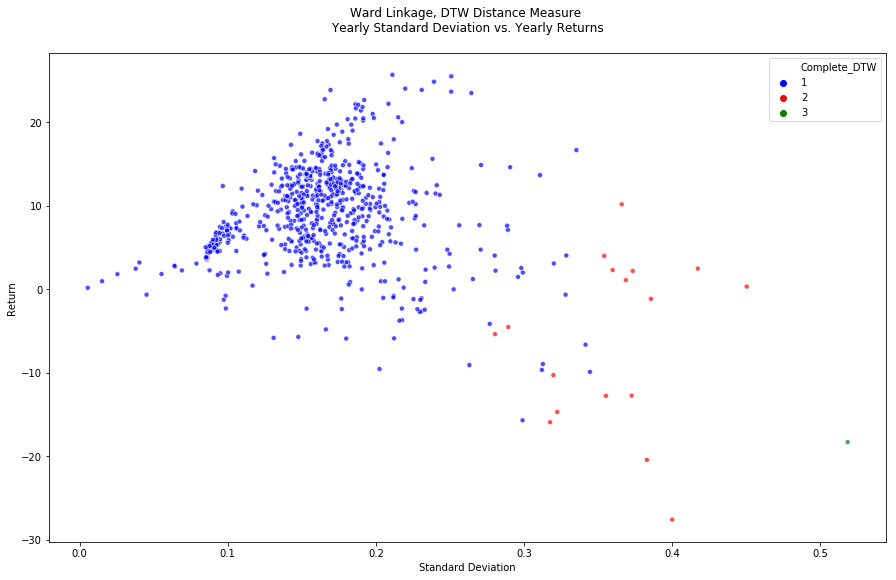

In [144]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=ret["AvgReturnYearly"]*100, x=ret["YearlyStd"], hue=cluster_df["Complete_DTW"], s=25,palette=["blue", "red", "green"], alpha=0.7)
plt.title("Ward Linkage, DTW Distance Measure \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return")
plt.xlabel("Standard Deviation")

plt.show()

**Now we print out which assets are in each cluster.**

Begin by looking into cluster 1:

In [145]:
print("ETFs in cluster 1: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 1) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 1: 
 


['ANGL',
 'AOA',
 'AOK',
 'AOM',
 'AOR',
 'ASHR',
 'BAB',
 'BBH',
 'BIL',
 'BIV',
 'BKLN',
 'BLV',
 'BND',
 'BNDX',
 'BOND',
 'BRF',
 'BSCJ',
 'BSCK',
 'BSCL',
 'BSCM',
 'BSJJ',
 'BSJK',
 'BSV',
 'BWX',
 'CDC',
 'CGW',
 'CMBS',
 'CMF',
 'CORP',
 'CSM',
 'CWB',
 'CWI',
 'DBA',
 'DBB',
 'DBC',
 'DBE',
 'DBEF',
 'DBEU',
 'DBJP',
 'DBO',
 'DBP',
 'DBS',
 'DBV',
 'DEM',
 'DES',
 'DFE',
 'DFJ',
 'DGL',
 'DGRO',
 'DGRW',
 'DGS',
 'DHS',
 'DIA',
 'DIV',
 'DJP',
 'DLN',
 'DLS',
 'DOL',
 'DON',
 'DSI',
 'DTD',
 'DTN',
 'DVY',
 'DVYA',
 'DVYE',
 'DWM',
 'DWX',
 'DXGE',
 'DXJ',
 'EBND',
 'ECH',
 'EDEN',
 'EDIV',
 'EDV',
 'EELV',
 'EEM',
 'EEMA',
 'EEMS',
 'EEMV',
 'EFA',
 'EFAV',
 'EFG',
 'EFV',
 'EIDO',
 'EIRL',
 'ELD',
 'EMB',
 'EMHY',
 'EMLC',
 'ENZL',
 'EPHE',
 'EPOL',
 'EPP',
 'EPU',
 'EUFN',
 'EWA',
 'EWC',
 'EWD',
 'EWG',
 'EWH',
 'EWI',
 'EWJ',
 'EWK',
 'EWL',
 'EWM',
 'EWN',
 'EWP',
 'EWQ',
 'EWS',
 'EWT',
 'EWU',
 'EWW',
 'EWX',
 'EWY',
 'EWZ',
 'EZA',
 'EZM',
 'EZU',
 'FBT',
 'FCOM',
 '

In [146]:
print("indexes in cluster 1: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 1) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 1: 
 


['AsiaSMALL LoBO',
 'AsiaME1 BO2',
 'AsiaME1 BO3',
 'AsiaME1 BO4',
 'AsiaSMALL HiBO',
 'AsiaME2 BO1',
 'AsiaME2 BO2',
 'AsiaME2 BO3',
 'AsiaME2 BO4',
 'AsiaME2 BO5',
 'AsiaME3 BO1',
 'AsiaME3 BO2',
 'AsiaME3 BO3',
 'AsiaME3 BO4',
 'AsiaME3 BO5',
 'AsiaME4 BO1',
 'AsiaME4 BO2',
 'AsiaME4 BO3',
 'AsiaME4 BO4',
 'AsiaME4 BO5',
 'AsiaBIG LoBO',
 'AsiaME5 BO2',
 'AsiaME5 BO3',
 'AsiaME5 BO4',
 'AsiaBIG HiBO',
 'GlobalSMALL LoBO',
 'GlobalME1 BO2',
 'GlobalME1 BO3',
 'GlobalME1 BO4',
 'GlobalSMALL HiBO',
 'GlobalME2 BO1',
 'GlobalME2 BO2',
 'GlobalME2 BO3',
 'GlobalME2 BO4',
 'GlobalME2 BO5',
 'GlobalME3 BO1',
 'GlobalME3 BO2',
 'GlobalME3 BO3',
 'GlobalME3 BO4',
 'GlobalME3 BO5',
 'GlobalME4 BO1',
 'GlobalME4 BO2',
 'GlobalME4 BO3',
 'GlobalME4 BO4',
 'GlobalME4 BO5',
 'GlobalBIG LoBO',
 'GlobalME5 BO2',
 'GlobalME5 BO3',
 'GlobalME5 BO4',
 'GlobalBIG HiBO',
 'EuropeSMALL LoBO',
 'EuropeME1 BO2',
 'EuropeME1 BO3',
 'EuropeME1 BO4',
 'EuropeSMALL HiBO',
 'EuropeME2 BO1',
 'EuropeME2 BO2',
 '

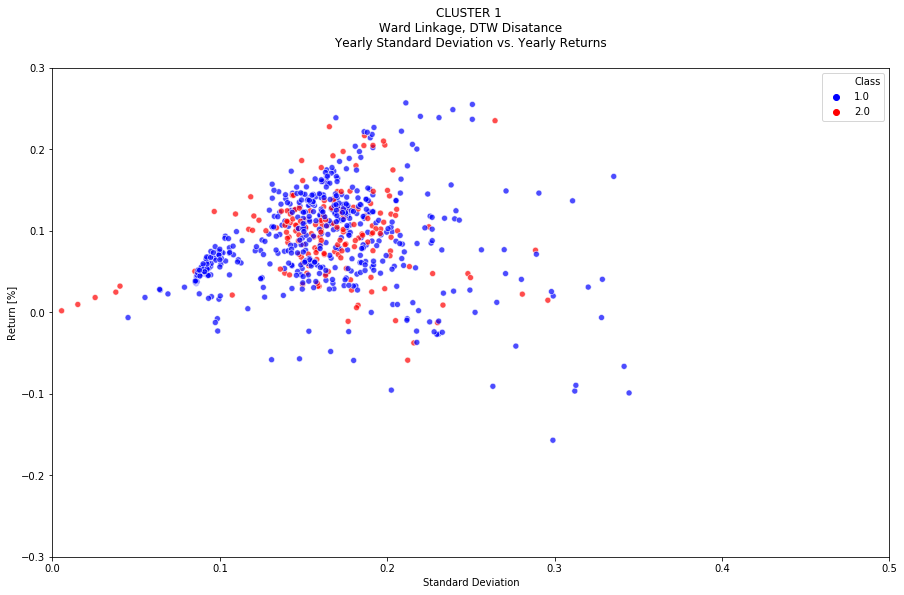

In [147]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_DTW"] == 1]["AverageRet"], x=cluster_df[cluster_df["Complete_DTW"] == 1]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 1 \n Ward Linkage, DTW Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

Now we look into cluster 2:

In [148]:
print("ETFs in cluster 2: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 2) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 2: 
 


['FCG',
 'FXN',
 'GDX',
 'GDXJ',
 'GREK',
 'IEO',
 'IEZ',
 'OIH',
 'RING',
 'RYE',
 'SGDM',
 'SIL',
 'SILJ',
 'SLVP',
 'XES',
 'XOP']

In [149]:
print("indexes in cluster 2: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 2) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 2: 
 


['Gold ']

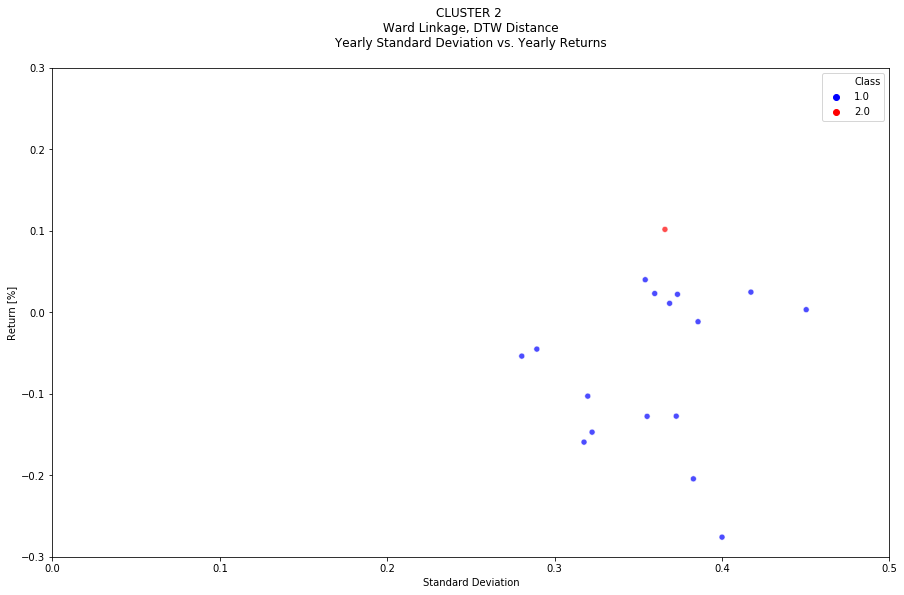

In [150]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_DTW"] == 2]["AverageRet"], x=cluster_df[cluster_df["Complete_DTW"] == 2]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 2 \n Ward Linkage, DTW Distance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

Now we look into cluster 3:

In [151]:
print("ETFs in cluster 3: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 3) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 3: 
 


[]

In [152]:
print("indexes in cluster 3: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 3) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 3: 
 


['Coal ']

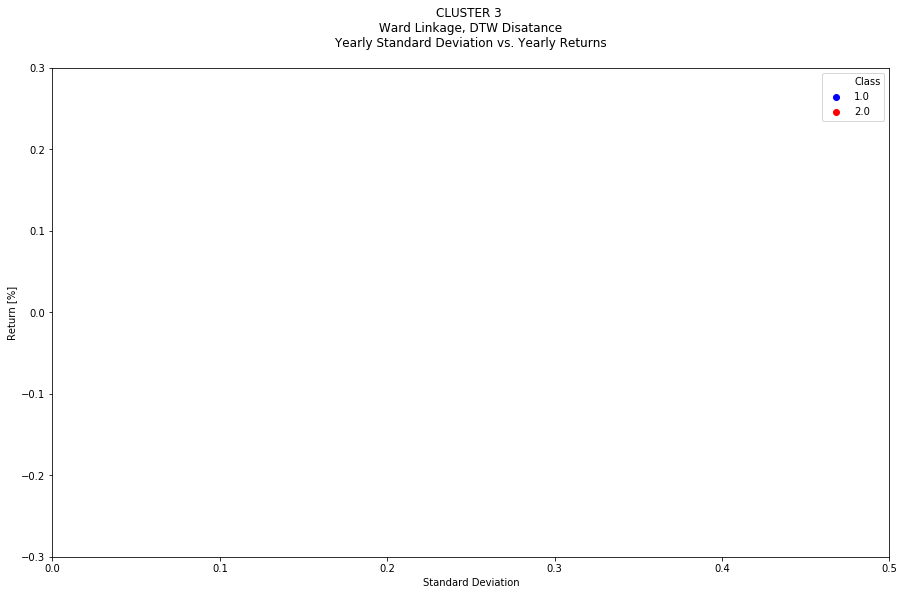

In [153]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_DTW"] == 3]["AverageRet"], x=cluster_df[cluster_df["Complete_DTW"] == 3]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 3 \n Ward Linkage, DTW Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

### Look into the comostion of clusters.

Import the ETFinfo dataframe

In [154]:
ETF_info = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFinfo.csv", index_col=0)

Save the ETFs in each clusters into a list.

In [155]:
cluster_1_ETFs = cluster_df[(cluster_df["Complete_Corr"] == 1) & (cluster_df["Class"] == 1)].index.tolist()
cluster_2_ETFs = cluster_df[(cluster_df["Complete_Corr"] == 2) & (cluster_df["Class"] == 1)].index.tolist()
cluster_3_ETFs = cluster_df[(cluster_df["Complete_Corr"] == 3) & (cluster_df["Class"] == 1)].index.tolist()

Display the assets class count for each of the three clusters.

In [156]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["assetClass"])[["assetClass"]].count()

,assetClass
assetClass,
Commodities,10
Currency,3
Equity,7
Fixed Income,19


In [157]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["assetClass"])[["assetClass"]].count()/ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["assetClass"])[["assetClass"]].count().sum()

,assetClass
assetClass,
Commodities,0.256410
Currency,0.076923
Equity,0.179487
Fixed Income,0.487179


In [158]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["assetClass"])[["assetClass"]].count()

,assetClass
assetClass,
Asset Allocation,5
Commodities,9
Currency,3
Equity,369
Fixed Income,7


In [159]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["assetClass"])[["assetClass"]].count()/ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["assetClass"])[["assetClass"]].count().sum()

,assetClass
assetClass,
Asset Allocation,0.012723
Commodities,0.022901
Currency,0.007634
Equity,0.938931
Fixed Income,0.017812


In [160]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["assetClass"])[["assetClass"]].count()

,assetClass
assetClass,
Alternatives,1
Currency,2
Equity,26
Fixed Income,78


In [161]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["assetClass"])[["assetClass"]].count()/ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["assetClass"])[["assetClass"]].count().sum()

,assetClass
assetClass,
Alternatives,0.009346
Currency,0.018692
Equity,0.242991
Fixed Income,0.728972


Display the region for each of the three clusters.

In [162]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["region"])[["region"]].count()

,region
region,
Developed Markets,1
Emerging Markets,5
Global,7
Global Ex-U.S.,3
North America,91


In [163]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["region"])[["region"]].count()

,region
region,
Asia-Pacific,30
Developed Markets,26
Emerging Markets,18
Europe,30
Global,43
Global Ex-U.S.,11
Latin America,6
Middle East & Africa,1
North America,228


In [164]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["region"])[["region"]].count()

,region
region,
Asia-Pacific,1
Developed Markets,2
Europe,2
Global,17
Global Ex-U.S.,2
North America,15


Display the economic development for each of the clusters.

In [165]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["economicDevelopment"])[["economicDevelopment"]].count()


,economicDevelopment
economicDevelopment,
Blended Development,19
Developed Markets,20


In [166]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["economicDevelopment"])[["economicDevelopment"]].count()


,economicDevelopment
economicDevelopment,
Blended Development,55
Developed Markets,297
Emerging Markets,40
Frontier Markets,1


In [167]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["economicDevelopment"])[["economicDevelopment"]].count()


,economicDevelopment
economicDevelopment,
Blended Development,10
Developed Markets,92
Emerging Markets,5


## 2.6 Looking into the Comopstition of Complete DTW Clustering


**How many assets are in each cluster?**

In [168]:
cluster_df.groupby(["Complete_DTW"]).count()["Sharpe_Ratio"]

Complete_DTW
1    701
2     17
3      1
Name: Sharpe_Ratio, dtype: int64

**What is the average yearly return and std in each cluster?**

In [107]:
cluster_df.groupby(["Complete_DTW"]).mean()["AverageRet"]

Complete_DTW
1    0.037248
2    0.093374
3    0.070300
Name: AverageRet, dtype: float64

In [108]:
cluster_df.groupby(["Complete_DTW"]).mean()["StandardDev"]

Complete_DTW
1    0.177995
2    0.179952
3    0.107713
Name: StandardDev, dtype: float64

**How do the indexes and ETFs spread between the clusters.**

In [109]:
cluster_df[cluster_df["Complete_DTW"] == 1].groupby(["Class"]).count()["Complete_DTW"]

Class
1.0    39
2.0     1
Name: Complete_DTW, dtype: int64

In [110]:
cluster_df[cluster_df["Complete_DTW"] == 2].groupby(["Class"]).count()["Complete_DTW"]

Class
1.0    393
2.0    167
Name: Complete_DTW, dtype: int64

In [111]:
cluster_df[cluster_df["Complete_DTW"] == 3].groupby(["Class"]).count()["Complete_DTW"]

Class
1.0    107
2.0     12
Name: Complete_DTW, dtype: int64

So we see that all the clusters consist of both indexes and ETFs, good news! Which gives us the idea that the indexes should represent the ETFs pretty well.

**Plot the clusters on a return/std plot.**

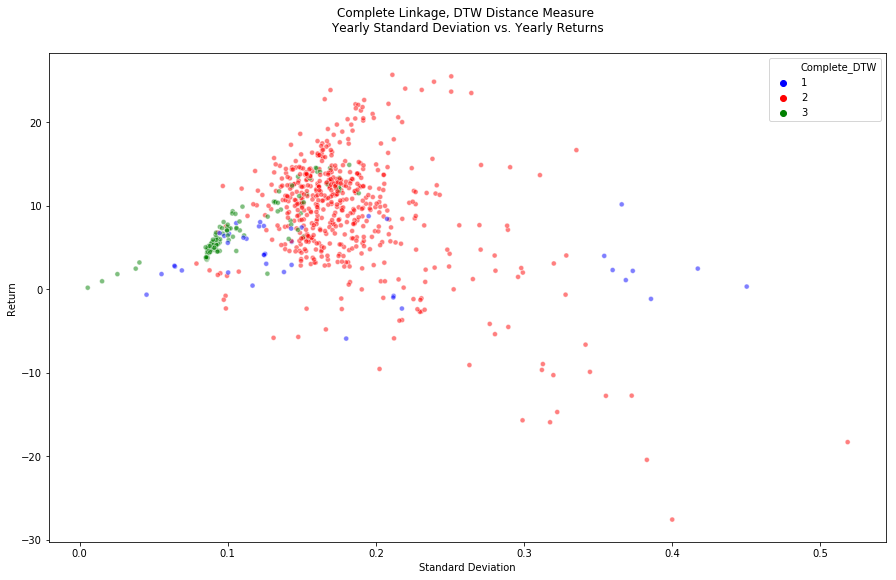

In [112]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=ret["AvgReturnYearly"]*100, x=ret["YearlyStd"], hue=cluster_df["Complete_DTW"], s=25,palette=["blue", "red", "green"], alpha=0.5)
plt.title("Complete Linkage, DTW Distance Measure \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return")
plt.xlabel("Standard Deviation")

plt.show()

**Now we print out which assets are in each cluster.**

Begin by looking into cluster 1:

In [113]:
print("ETFs in cluster 1: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 1) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 1: 
 


['BAB',
 'BLV',
 'BWX',
 'CORP',
 'DBP',
 'DBS',
 'DGL',
 'EDV',
 'FXE',
 'FXF',
 'FXY',
 'GDX',
 'GDXJ',
 'GLD',
 'GLTR',
 'IAU',
 'IBND',
 'IEF',
 'IGOV',
 'ILTB',
 'LQD',
 'LTPZ',
 'PICB',
 'PLW',
 'PPLT',
 'RING',
 'SGDM',
 'SGOL',
 'SIL',
 'SILJ',
 'SIVR',
 'SLV',
 'SLVP',
 'TLH',
 'TLT',
 'VCIT',
 'VCLT',
 'VGLT',
 'ZROZ']

In [114]:
print("indexes in cluster 1: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 1) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 1: 
 


['Gold ']

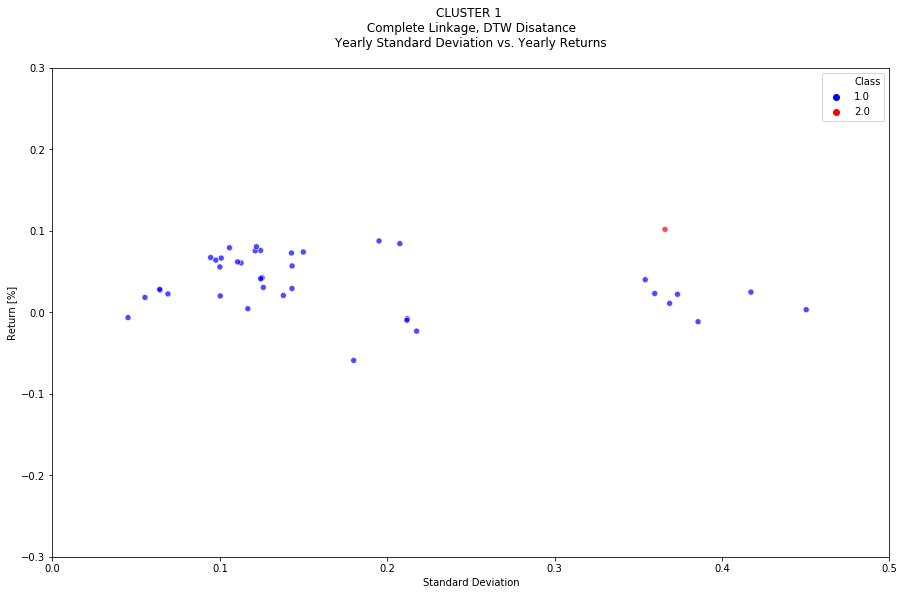

In [115]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_DTW"] == 1]["AverageRet"], x=cluster_df[cluster_df["Complete_DTW"] == 1]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 1 \n Complete Linkage, DTW Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

Now we look into cluster 2:

In [116]:
print("ETFs in cluster 2: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 2) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 2: 
 


['AOA',
 'AOK',
 'AOM',
 'AOR',
 'ASHR',
 'BBH',
 'BRF',
 'CDC',
 'CGW',
 'CSM',
 'CWB',
 'CWI',
 'DBA',
 'DBB',
 'DBC',
 'DBE',
 'DBEF',
 'DBEU',
 'DBJP',
 'DBO',
 'DEM',
 'DES',
 'DFE',
 'DFJ',
 'DGRO',
 'DGRW',
 'DGS',
 'DHS',
 'DIA',
 'DIV',
 'DJP',
 'DLN',
 'DLS',
 'DOL',
 'DON',
 'DSI',
 'DTD',
 'DTN',
 'DVY',
 'DVYA',
 'DVYE',
 'DWM',
 'DWX',
 'DXGE',
 'DXJ',
 'EBND',
 'ECH',
 'EDEN',
 'EDIV',
 'EELV',
 'EEM',
 'EEMA',
 'EEMS',
 'EEMV',
 'EFA',
 'EFAV',
 'EFG',
 'EFV',
 'EIDO',
 'EIRL',
 'ELD',
 'EMLC',
 'ENZL',
 'EPHE',
 'EPOL',
 'EPP',
 'EPU',
 'EUFN',
 'EWA',
 'EWC',
 'EWD',
 'EWG',
 'EWH',
 'EWI',
 'EWJ',
 'EWK',
 'EWL',
 'EWM',
 'EWN',
 'EWP',
 'EWQ',
 'EWS',
 'EWT',
 'EWU',
 'EWW',
 'EWX',
 'EWY',
 'EWZ',
 'EZA',
 'EZM',
 'EZU',
 'FBT',
 'FCG',
 'FCOM',
 'FDD',
 'FDIS',
 'FDL',
 'FDN',
 'FENY',
 'FEU',
 'FEX',
 'FEZ',
 'FGD',
 'FHLC',
 'FIDU',
 'FMAT',
 'FNCL',
 'FNDA',
 'FNDC',
 'FNDE',
 'FNDF',
 'FNDX',
 'FNX',
 'FPX',
 'FTA',
 'FTC',
 'FTCS',
 'FTEC',
 'FVD',
 'FXA',
 '

In [117]:
print("indexes in cluster 2: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 2) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 2: 
 


['AsiaSMALL LoBO',
 'AsiaME1 BO2',
 'AsiaME1 BO3',
 'AsiaME1 BO4',
 'AsiaSMALL HiBO',
 'AsiaME2 BO1',
 'AsiaME2 BO2',
 'AsiaME2 BO3',
 'AsiaME2 BO4',
 'AsiaME2 BO5',
 'AsiaME3 BO1',
 'AsiaME3 BO2',
 'AsiaME3 BO3',
 'AsiaME3 BO4',
 'AsiaME3 BO5',
 'AsiaME4 BO1',
 'AsiaME4 BO2',
 'AsiaME4 BO3',
 'AsiaME4 BO4',
 'AsiaME4 BO5',
 'AsiaBIG LoBO',
 'AsiaME5 BO2',
 'AsiaME5 BO3',
 'AsiaME5 BO4',
 'AsiaBIG HiBO',
 'GlobalSMALL LoBO',
 'GlobalME1 BO2',
 'GlobalME1 BO3',
 'GlobalME1 BO4',
 'GlobalSMALL HiBO',
 'GlobalME2 BO1',
 'GlobalME2 BO2',
 'GlobalME2 BO3',
 'GlobalME2 BO4',
 'GlobalME2 BO5',
 'GlobalME3 BO1',
 'GlobalME3 BO2',
 'GlobalME3 BO3',
 'GlobalME3 BO4',
 'GlobalME3 BO5',
 'GlobalME4 BO1',
 'GlobalME4 BO2',
 'GlobalME4 BO3',
 'GlobalME4 BO4',
 'GlobalME4 BO5',
 'GlobalBIG LoBO',
 'GlobalME5 BO2',
 'GlobalME5 BO3',
 'GlobalME5 BO4',
 'GlobalBIG HiBO',
 'EuropeSMALL LoBO',
 'EuropeME1 BO2',
 'EuropeME1 BO3',
 'EuropeME1 BO4',
 'EuropeSMALL HiBO',
 'EuropeME2 BO1',
 'EuropeME2 BO2',
 '

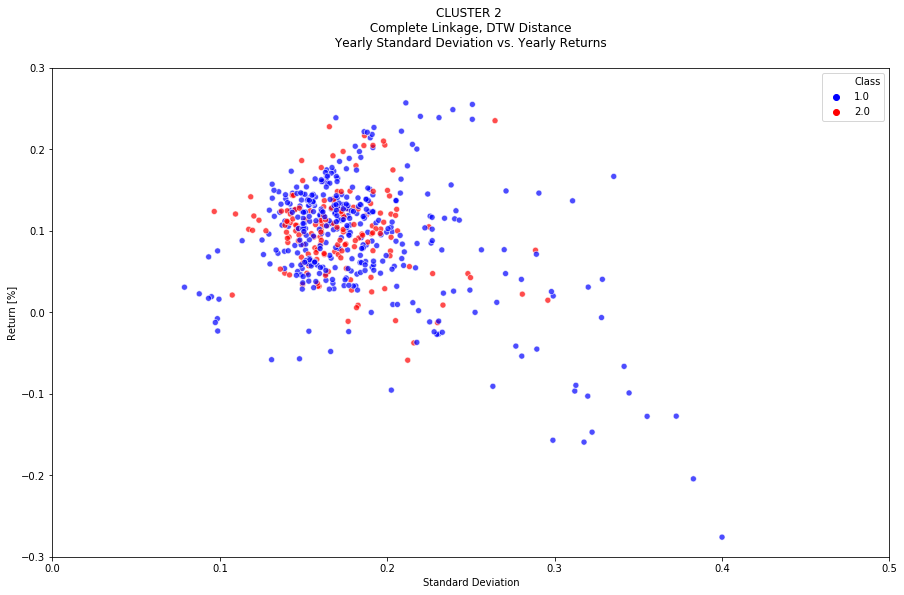

In [118]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_DTW"] == 2]["AverageRet"], x=cluster_df[cluster_df["Complete_DTW"] == 2]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 2 \n Complete Linkage, DTW Distance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

Now we look into cluster 3:

In [119]:
print("ETFs in cluster 3: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 3) & (cluster_df["Class"] == 1)].index.tolist()

ETFs in cluster 3: 
 


['ANGL',
 'BIL',
 'BIV',
 'BKLN',
 'BND',
 'BNDX',
 'BOND',
 'BSCJ',
 'BSCK',
 'BSCL',
 'BSCM',
 'BSJJ',
 'BSJK',
 'BSV',
 'CMBS',
 'CMF',
 'DBV',
 'EMB',
 'EMHY',
 'FLOT',
 'FLRN',
 'FRI',
 'FSTA',
 'FTSM',
 'FUTY',
 'FXG',
 'FXU',
 'GBF',
 'GNMA',
 'GOVT',
 'GSY',
 'GVI',
 'HYD',
 'HYEM',
 'HYG',
 'HYMB',
 'HYS',
 'ICF',
 'IDU',
 'IEI',
 'IPE',
 'ISTB',
 'ITE',
 'ITM',
 'IUSB',
 'IYK',
 'IYR',
 'JNK',
 'JXI',
 'KXI',
 'MBB',
 'MINT',
 'MUB',
 'MUNI',
 'PBJ',
 'PCY',
 'PFF',
 'PFXF',
 'PGF',
 'PGX',
 'PHB',
 'PSK',
 'PSL',
 'PUI',
 'PWZ',
 'PZA',
 'REET',
 'REZ',
 'RHS',
 'RWO',
 'RWR',
 'RYU',
 'SCHH',
 'SCHO',
 'SCHP',
 'SCHR',
 'SCHZ',
 'SHM',
 'SHV',
 'SHY',
 'SHYG',
 'SJNK',
 'SLQD',
 'SNLN',
 'SPFF',
 'SRLN',
 'STIP',
 'STPZ',
 'SUB',
 'TDTF',
 'TDTT',
 'TFI',
 'TIP',
 'USDU',
 'UUP',
 'VCSH',
 'VDC',
 'VGIT',
 'VGSH',
 'VMBS',
 'VNQ',
 'VPU',
 'VRP',
 'VTIP',
 'VWOB',
 'XLP',
 'XLU']

In [120]:
print("indexes in cluster 3: \n ")
cluster_df[(cluster_df["Complete_DTW"] == 3) & (cluster_df["Class"] == 2)].index.tolist()

indexes in cluster 3: 
 


['Food ',
 'Soda ',
 'Beer ',
 'Smoke',
 'Hshld',
 'Util ',
 'LEATTREU Index',
 'LET1TREU Index',
 'LET3TREU Index',
 'LET5TREU Index',
 'LET7TREU Index',
 'LET0TREU Index']

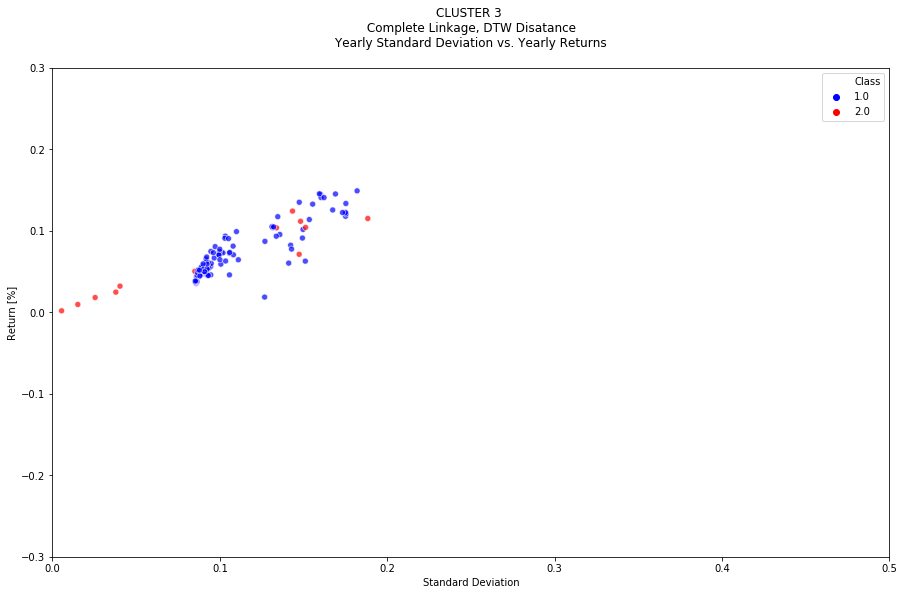

In [121]:
plt.figure(figsize=(15,9))
sns.scatterplot(y=cluster_df[cluster_df["Complete_DTW"] == 3]["AverageRet"], x=cluster_df[cluster_df["Complete_DTW"] == 3]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 3 \n Complete Linkage, DTW Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.ylabel("Return [%]")
plt.xlabel("Standard Deviation")
axes = plt.gca()
axes.set_ylim(-0.3,0.3)
axes.set_xlim(0,0.5)

plt.show()

### Look into the comostion of clusters.

Save the ETFs in each clusters into a list.

In [122]:
cluster_1_ETFs = cluster_df[(cluster_df["Complete_DTW"] == 1) & (cluster_df["Class"] == 1)].index.tolist()
cluster_2_ETFs = cluster_df[(cluster_df["Complete_DTW"] == 2) & (cluster_df["Class"] == 1)].index.tolist()
cluster_3_ETFs = cluster_df[(cluster_df["Complete_DTW"] == 3) & (cluster_df["Class"] == 1)].index.tolist()

Display the assets class count for each of the three clusters.

In [123]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["assetClass"])[["assetClass"]].count()/ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["assetClass"])[["assetClass"]].count().sum()

,assetClass
assetClass,
Commodities,0.256410
Currency,0.076923
Equity,0.179487
Fixed Income,0.487179


In [124]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["assetClass"])[["assetClass"]].count()/ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["assetClass"])[["assetClass"]].count().sum()

,assetClass
assetClass,
Asset Allocation,0.012723
Commodities,0.022901
Currency,0.007634
Equity,0.938931
Fixed Income,0.017812


In [125]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["assetClass"])[["assetClass"]].count()/ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["assetClass"])[["assetClass"]].count().sum()

,assetClass
assetClass,
Alternatives,0.009346
Currency,0.018692
Equity,0.242991
Fixed Income,0.728972


Display the region for each of the three clusters.

In [126]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["region"])[["region"]].count()

,region
region,
Developed Markets,1
Emerging Markets,5
Global,7
Global Ex-U.S.,3
North America,91


In [127]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["region"])[["region"]].count()

,region
region,
Asia-Pacific,30
Developed Markets,26
Emerging Markets,18
Europe,30
Global,43
Global Ex-U.S.,11
Latin America,6
Middle East & Africa,1
North America,228


In [128]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["region"])[["region"]].count()

,region
region,
Asia-Pacific,1
Developed Markets,2
Europe,2
Global,17
Global Ex-U.S.,2
North America,15


Display the economic development for each of the clusters.

In [129]:
ETF_info[ETF_info.index.isin(cluster_1_ETFs)].groupby(["economicDevelopment"])[["economicDevelopment"]].count()


,economicDevelopment
economicDevelopment,
Blended Development,19
Developed Markets,20


In [130]:
ETF_info[ETF_info.index.isin(cluster_2_ETFs)].groupby(["economicDevelopment"])[["economicDevelopment"]].count()


,economicDevelopment
economicDevelopment,
Blended Development,55
Developed Markets,297
Emerging Markets,40
Frontier Markets,1


In [131]:
ETF_info[ETF_info.index.isin(cluster_3_ETFs)].groupby(["economicDevelopment"])[["economicDevelopment"]].count()


,economicDevelopment
economicDevelopment,
Blended Development,10
Developed Markets,92
Emerging Markets,5


## 2.6 Find the Assets to Represent each Cluster


### 2.6.1 Using the mediod of each cluster

First we want to find the mediod of each cluster. That should be the asset that is the most representative of the asset.

We use this to help us:
1. Compute the pairwise distance matrix
2. Compute column or row sum
3. Use argmin to find mediod index

https://stackoverflow.com/questions/38017194/calculating-medoid-of-a-cluster-python

**Now we begin by looking at the ETFs in cluster 1 and find the mediod for them.**

First we save the names of all the ETFs in that cluster.

In [127]:
Cluster1_ETFs = cluster_df[(cluster_df["Complete_Corr"] == 1) & (cluster_df["Class"] == 1)].index.tolist()

Take only the ETFs in the Cluster1_ETFs and create a new distance_corr matrix

In [128]:
distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs]

And finally sum over the rows/columns (gives the same vector) and find the 3 lowest values. This gives us the ETF that has the lowest overall distance with all the other ETFs in the cluster.

In [129]:
distance_corr_cluster1.sum(axis=0).sort_values()[:3].index.tolist()

['BWX', 'IGOV', 'GLD']

**Now that we have shown how this works we do this for the Ward_Corr clustering.**
Begin by creating a list to save the values to.

In [135]:
Ward_Corr_Rep=[]

Cluster 1, get three represtatives from the mediods

In [136]:
Cluster1_ETFs = cluster_df[(cluster_df["Ward_Corr"] == 1) & (cluster_df["Class"] == 1)].index.tolist()
distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs]
Ward_Corr_Rep.append(distance_corr_cluster1.sum(axis=0).sort_values()[:3].index.tolist())

Do the same for cluster 2

In [137]:
Cluster2_ETFs = cluster_df[(cluster_df["Ward_Corr"] == 2) & (cluster_df["Class"] == 1)].index.tolist()
distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs]
Ward_Corr_Rep.append(distance_corr_cluster2.sum(axis=0).sort_values()[:3].index.tolist())

And finally for cluster 3

In [138]:
Cluster3_ETFs = cluster_df[(cluster_df["Ward_Corr"] == 3) & (cluster_df["Class"] == 1)].index.tolist()
distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs]
Ward_Corr_Rep.append(distance_corr_cluster3.sum(axis=0).sort_values()[:3].index.tolist())

**Repeat for Ward_DTW clustering.**

Begin by creating a list to save the values to.

In [139]:
Ward_DTW_Rep=[]

Cluster 1, get three represtatives from the mediods

In [140]:
Cluster1_ETFs = cluster_df[(cluster_df["Ward_DTW"] == 1) & (cluster_df["Class"] == 1)].index.tolist()
distance_corr_cluster1 = distance_corr.loc[Cluster1_ETFs, Cluster1_ETFs]
Ward_DTW_Rep.append(distance_corr_cluster1.sum(axis=0).sort_values()[:3].index.tolist())

Do the same for cluster 2

In [141]:
Cluster2_ETFs = cluster_df[(cluster_df["Ward_DTW"] == 2) & (cluster_df["Class"] == 1)].index.tolist()
distance_corr_cluster2 = distance_corr.loc[Cluster2_ETFs, Cluster2_ETFs]
Ward_DTW_Rep.append(distance_corr_cluster2.sum(axis=0).sort_values()[:3].index.tolist())

And finally for cluster 3

In [142]:
Cluster3_ETFs = cluster_df[(cluster_df["Ward_DTW"] == 3) & (cluster_df["Class"] == 1)].index.tolist()
distance_corr_cluster3 = distance_corr.loc[Cluster3_ETFs, Cluster3_ETFs]
Ward_DTW_Rep.append(distance_corr_cluster3.sum(axis=0).sort_values()[:3].index.tolist())

### 2.6.2 Sharpe Ratio

https://www.slideshare.net/slideshow/embed_code/key/AVebCjyKtIjFSI

Now we want to add the three assets with the highest Sharpe Ratio to the lists.

**Begin by doing it for the Ward_Corr Clustering.**

In [143]:
Ward_Corr_Rep.append(cluster_df[(cluster_df["Ward_Corr"] == 1) & (cluster_df["Class"] == 1)]["Sharpe_Ratio"].sort_values()[-3:].index.tolist())
Ward_Corr_Rep.append(cluster_df[(cluster_df["Ward_Corr"] == 2) & (cluster_df["Class"] == 1)]["Sharpe_Ratio"].sort_values()[-3:].index.tolist())
Ward_Corr_Rep.append(cluster_df[(cluster_df["Ward_Corr"] == 3) & (cluster_df["Class"] == 1)]["Sharpe_Ratio"].sort_values()[-3:].index.tolist())
                                

**Repeat for the Ward_DTW Clustering.**

In [144]:
Ward_DTW_Rep.append(cluster_df[(cluster_df["Ward_DTW"] == 1) & (cluster_df["Class"] == 1)]["Sharpe_Ratio"].sort_values()[-3:].index.tolist())
Ward_DTW_Rep.append(cluster_df[(cluster_df["Ward_DTW"] == 2) & (cluster_df["Class"] == 1)]["Sharpe_Ratio"].sort_values()[-3:].index.tolist())
Ward_DTW_Rep.append(cluster_df[(cluster_df["Ward_DTW"] == 3) & (cluster_df["Class"] == 1)]["Sharpe_Ratio"].sort_values()[-3:].index.tolist())
   

**Display the lists.** 

We see that they are list of lists, which needs to be fixed.

In [145]:
Ward_Corr_Rep

[['VT', 'AOA', 'URTH'],
 ['GLTR', 'DBP', 'GDX'],
 ['IUSB', 'BOND', 'AOK'],
 ['SKYY', 'IGV', 'IHI'],
 ['GLD', 'SGOL', 'IAU'],
 ['SPLV', 'USMV', 'XMLV']]

In [146]:
Ward_DTW_Rep

[['IGE', 'IXC', 'VDE'],
 ['IUSB', 'ISTB', 'VCSH'],
 ['AOA', 'VT', 'VTI'],
 ['XBI', 'FBT', 'PALL'],
 ['PGX', 'ANGL', 'PGF'],
 ['XMLV', 'IGV', 'IHI']]

**Flatten out the lists.**

In [147]:
Ward_Corr_Rep_flat=[]
for list in Ward_Corr_Rep:
    for i in list:
        Ward_Corr_Rep_flat.append(i)
        
Ward_Corr_Rep=Ward_Corr_Rep_flat

In [148]:
Ward_DTW_Rep_flat=[]
for list in Ward_DTW_Rep:
    for i in list:
        Ward_DTW_Rep_flat.append(i)
        
Ward_DTW_Rep=Ward_DTW_Rep_flat

In [149]:
Ward_Corr_Rep

['VT',
 'AOA',
 'URTH',
 'GLTR',
 'DBP',
 'GDX',
 'IUSB',
 'BOND',
 'AOK',
 'SKYY',
 'IGV',
 'IHI',
 'GLD',
 'SGOL',
 'IAU',
 'SPLV',
 'USMV',
 'XMLV']

In [150]:
Ward_DTW_Rep

['IGE',
 'IXC',
 'VDE',
 'IUSB',
 'ISTB',
 'VCSH',
 'AOA',
 'VT',
 'VTI',
 'XBI',
 'FBT',
 'PALL',
 'PGX',
 'ANGL',
 'PGF',
 'XMLV',
 'IGV',
 'IHI']

In [151]:
import numpy as np
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans

In [152]:
setdiff_sorted(Ward_DTW_Rep, Ward_Corr_Rep)

['ANGL',
 'FBT',
 'IGE',
 'ISTB',
 'IXC',
 'PALL',
 'PGF',
 'PGX',
 'VCSH',
 'VDE',
 'VTI',
 'XBI']

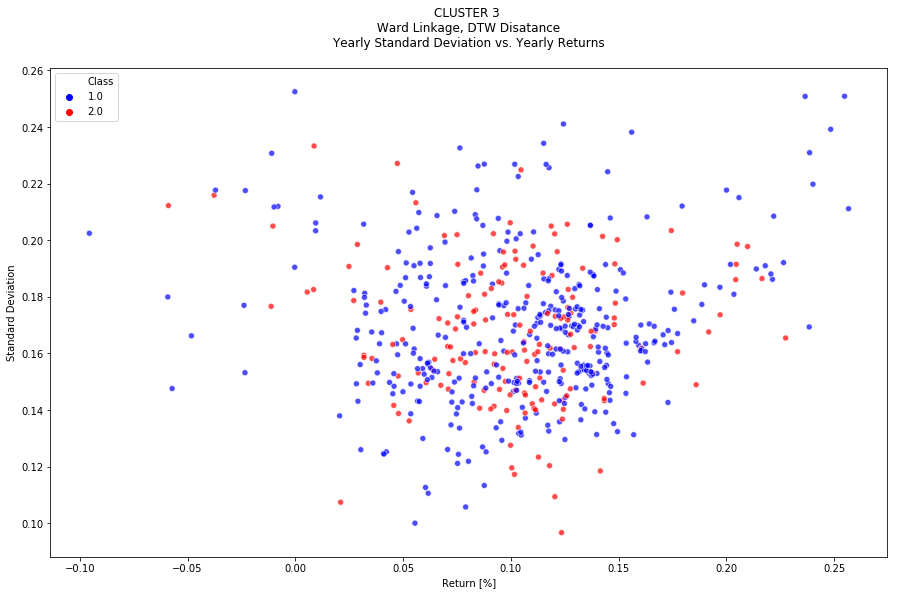

In [153]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=cluster_df[cluster_df["Ward_DTW"] == 3]["AverageRet"], y=cluster_df[cluster_df["Ward_DTW"] == 3]["StandardDev"], hue=cluster_df["Class"], palette=["blue", "red"], alpha=0.7)
plt.title("CLUSTER 3 \n Ward Linkage, DTW Disatance \n Yearly Standard Deviation vs. Yearly Returns \n ")
plt.xlabel("Return [%]")
plt.ylabel("Standard Deviation")

plt.show()